In [3]:
%matplotlib inline
import logging
from utils import logging as lg
lg.set_logging(logging.ERROR)

from scipy import stats
from skimage.measure import block_reduce
import numpy as np

import logging

import pandas as pd
import pickle
from notebook_utils import plot 
import seaborn as sns
import glob
sns.set(color_codes=True, font_scale=2, style="white", palette="bright")

from model import base, provider, heatmap_evaluation
import config
import matplotlib.pyplot as plt
import tensorflow as tf
import yaml
tf.logging.set_verbosity(tf.logging.ERROR)

from utils import data_provider

dataset_loader = data_provider.DatasetLoader(data_dir='../data')

from tabulate import tabulate


# ConvDeep vs ConDeep with literal connection
![](https://i.imgur.com/vKH2EKs.png)

## MNIST

/Users/heytitle/projects/heatmapping-tutorial/src/model/components/layer.py:34: RuntimeWarning: divide by zero encountered in log
  self.b = tf.Variable(tf.ones(dims[-1]) * float(np.log(np.exp(DEFAULT_BIAS_VALUE)-1)), name=b_name)


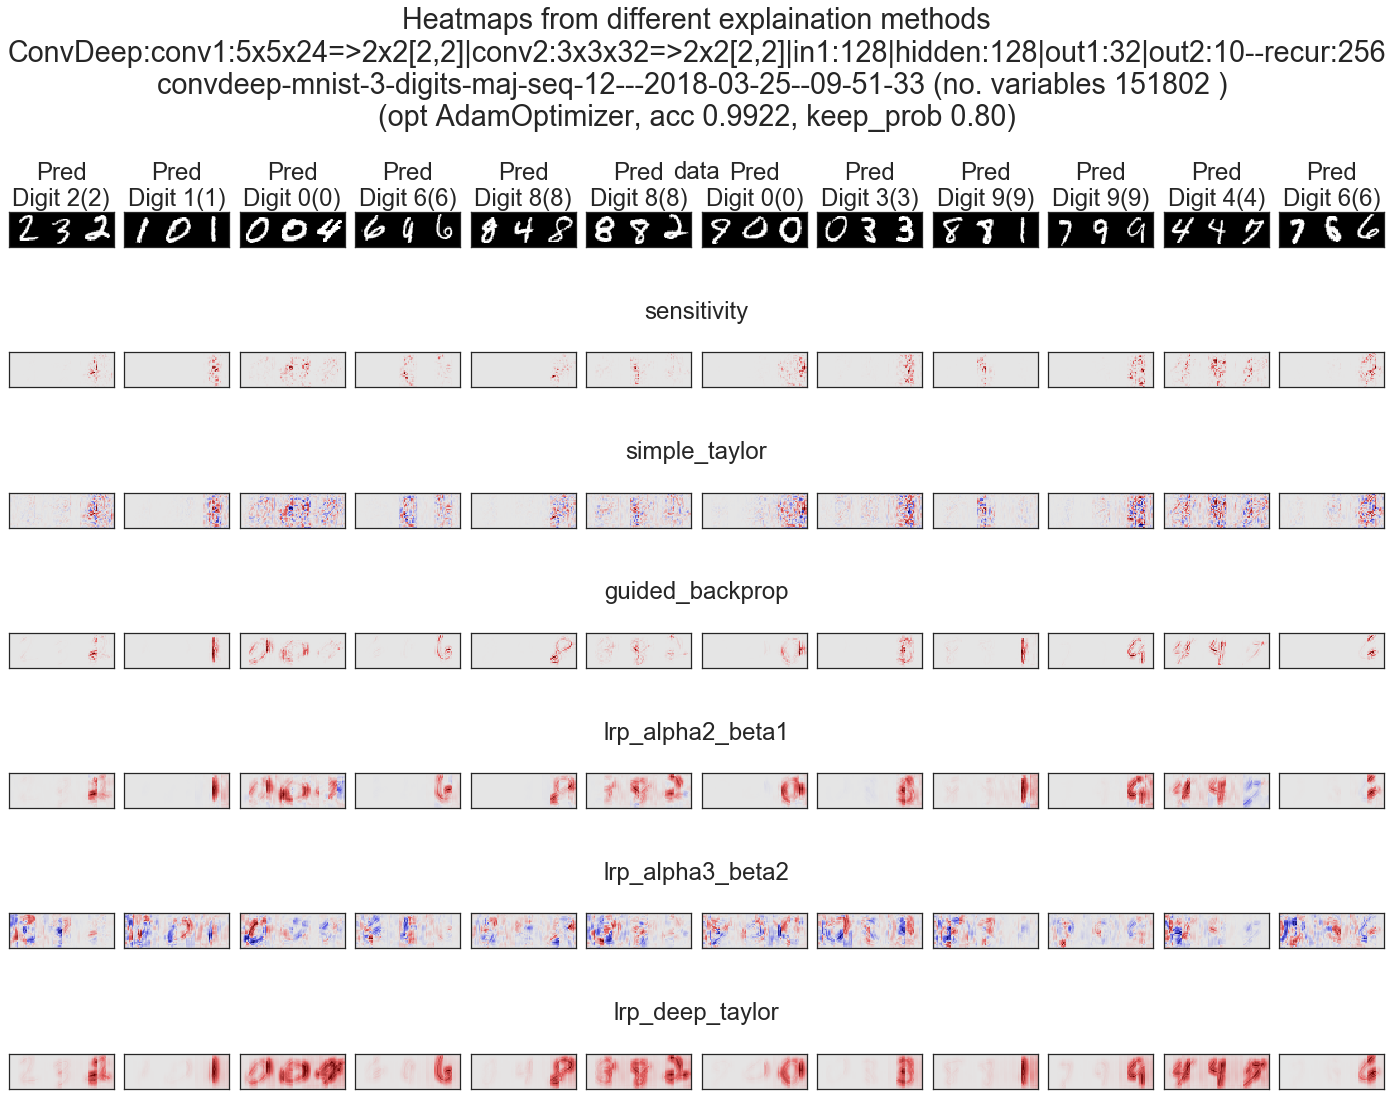

In [3]:
plot.plot_relevance_methods("../final-models/convdeep-mnist-3-digits-maj-seq-12", 
                            dataset_loader) 

/Users/heytitle/projects/heatmapping-tutorial/src/model/components/layer.py:34: RuntimeWarning: divide by zero encountered in log
  self.b = tf.Variable(tf.ones(dims[-1]) * float(np.log(np.exp(DEFAULT_BIAS_VALUE)-1)), name=b_name)


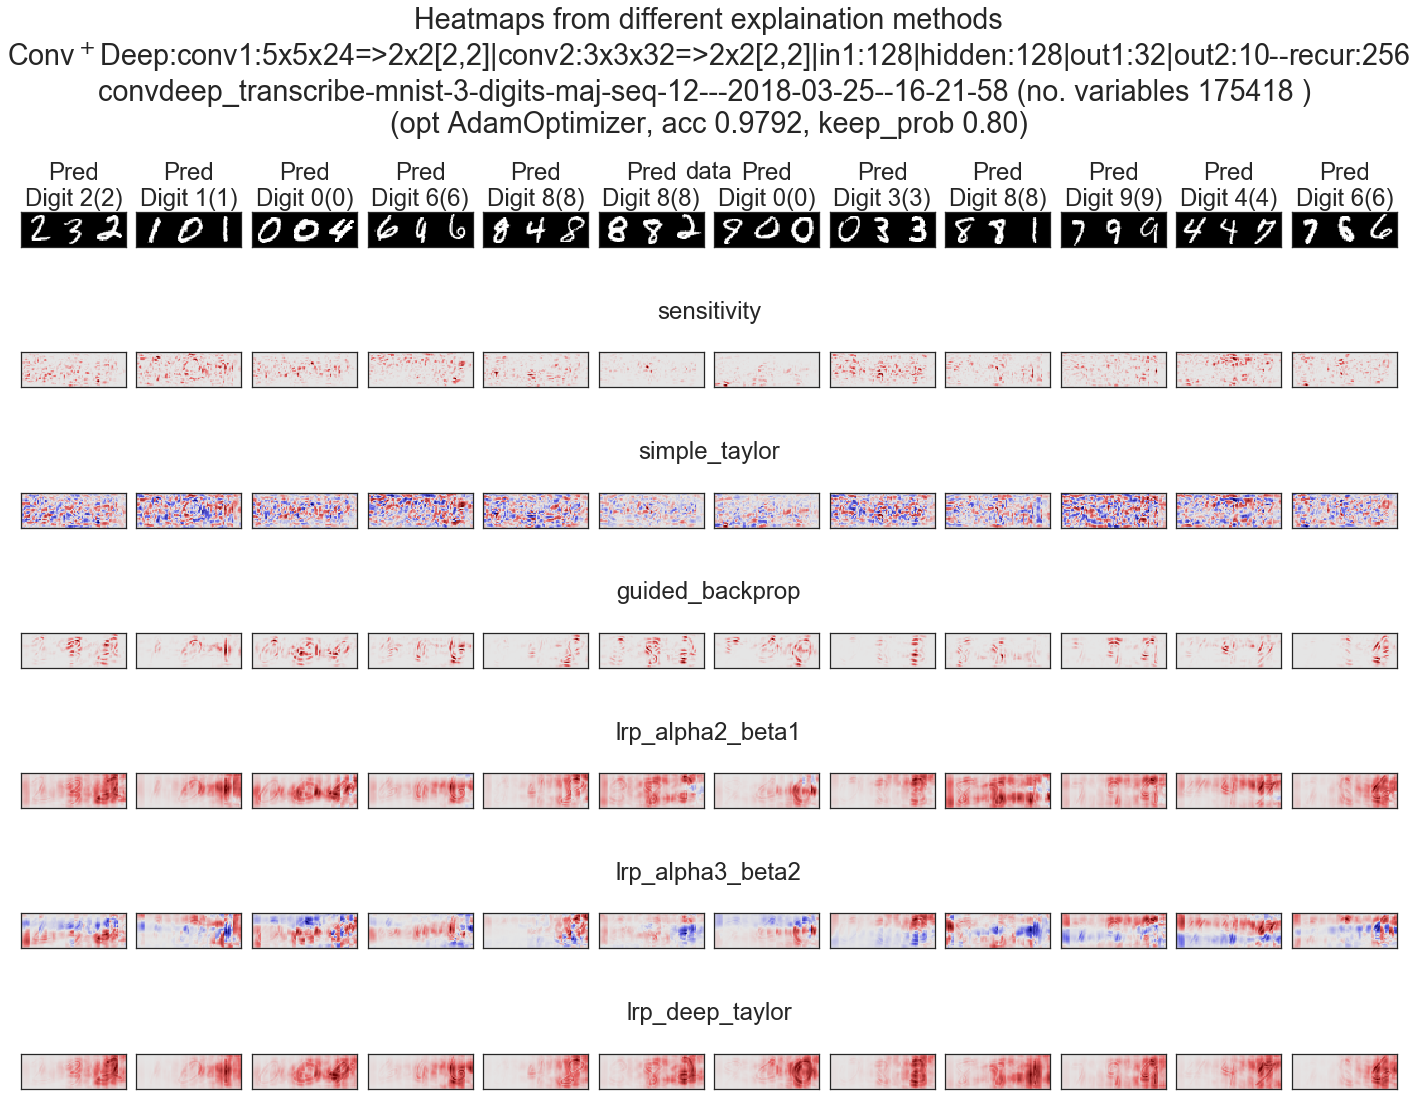

In [17]:
# convdeep with literal connection
plot.plot_relevance_methods("../final-models/convdeep_transcribe-mnist-3-digits-maj-seq-12",  dataset_loader) 

/Users/heytitle/projects/heatmapping-tutorial/src/model/components/layer.py:34: RuntimeWarning: divide by zero encountered in log
  self.b = tf.Variable(tf.ones(dims[-1]) * float(np.log(np.exp(DEFAULT_BIAS_VALUE)-1)), name=b_name)


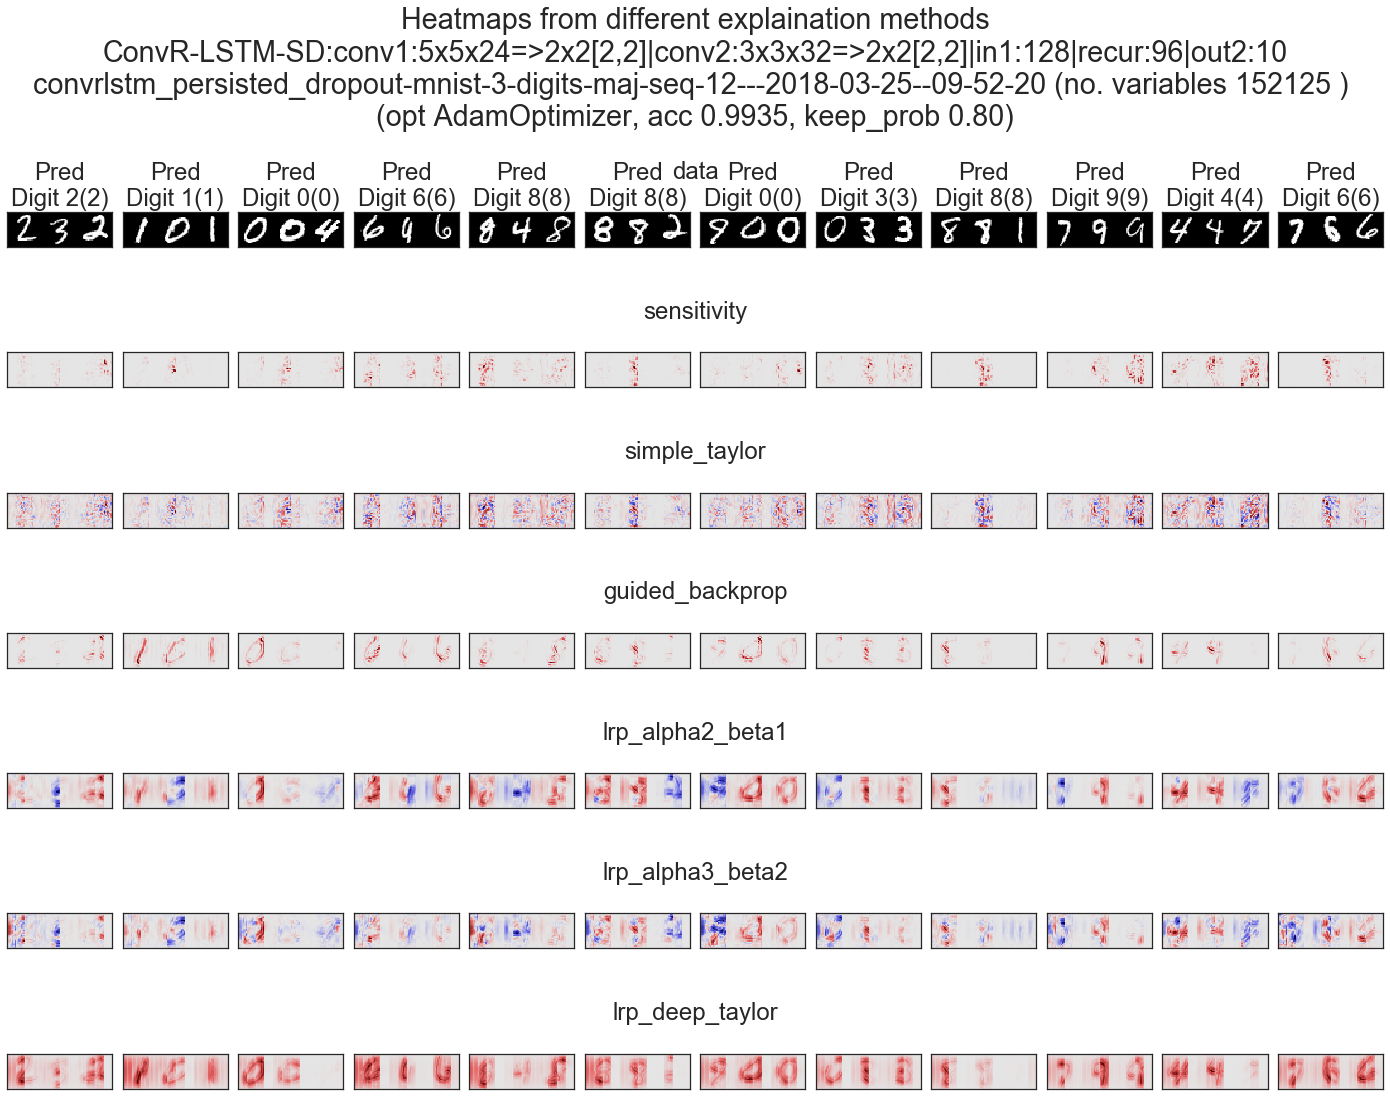

In [18]:
# convdeep with literal connection
plot.plot_relevance_methods("../final-models/convrlstm_persisted_dropout-mnist-3-digits-maj-seq-12",  dataset_loader) 

/Users/heytitle/projects/heatmapping-tutorial/src/model/components/layer.py:34: RuntimeWarning: divide by zero encountered in log
  self.b = tf.Variable(tf.ones(dims[-1]) * float(np.log(np.exp(DEFAULT_BIAS_VALUE)-1)), name=b_name)


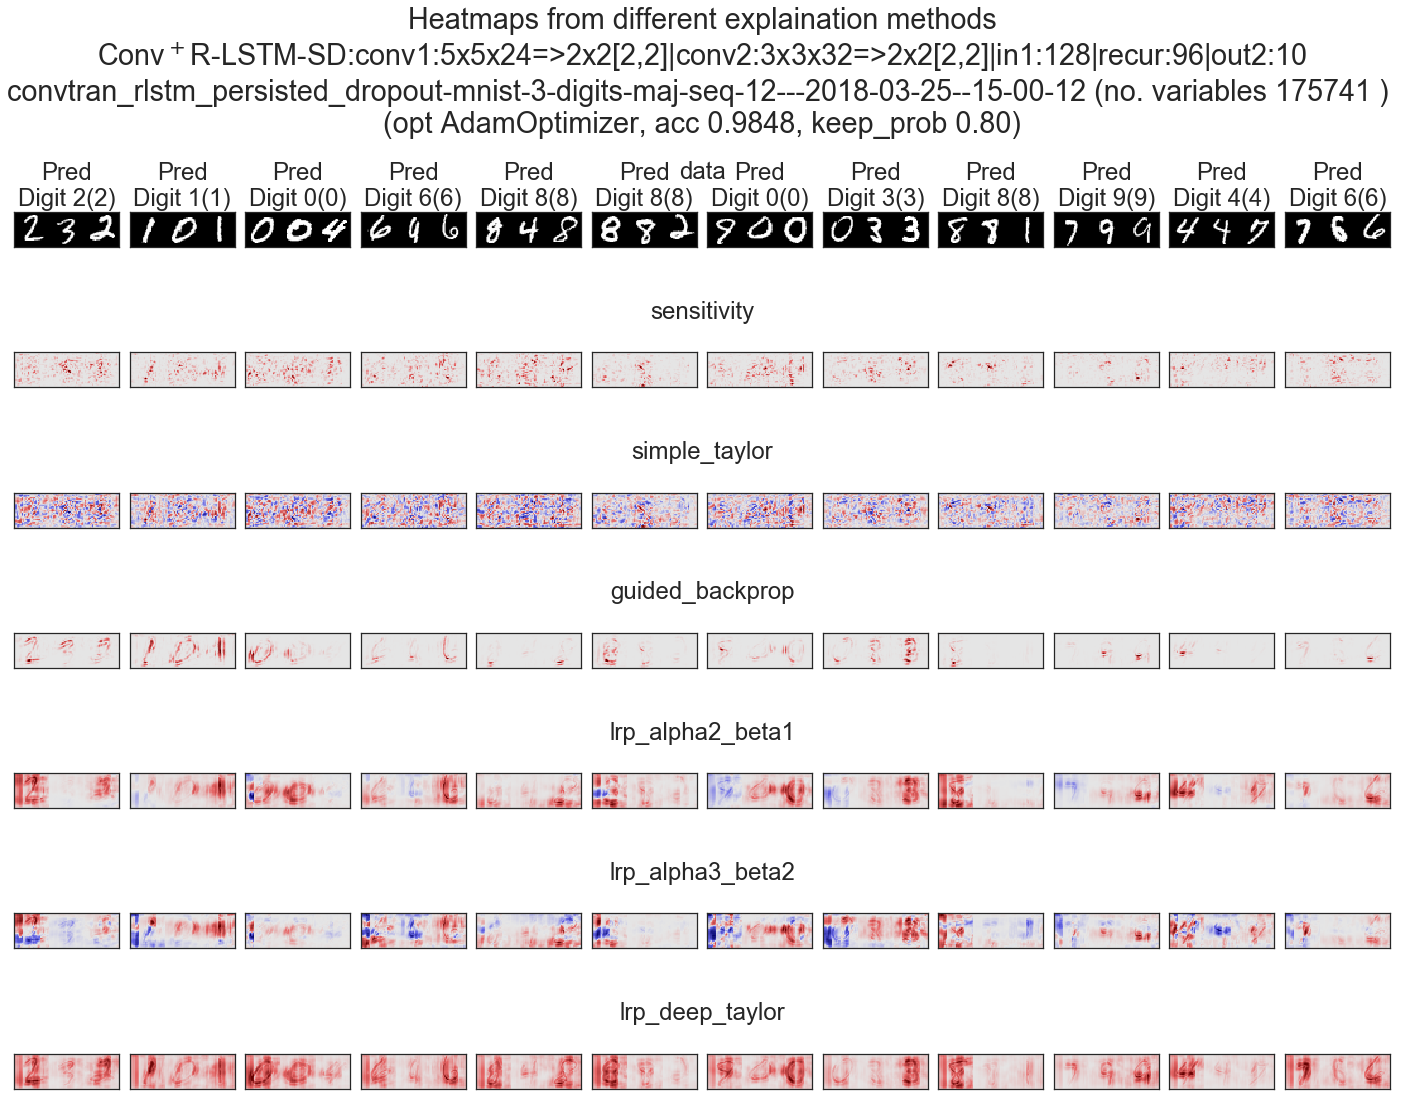

In [19]:
plot.plot_relevance_methods("../final-models/convtran_rlstm_persisted_dropout-mnist-3-digits-maj-seq-12",  dataset_loader) 

## FashionMNIST

/Users/heytitle/projects/heatmapping-tutorial/src/model/components/layer.py:25: RuntimeWarning: divide by zero encountered in log
  self.b = tf.Variable(tf.ones(dims[-1]) * float(np.log(np.exp(DEFAULT_BIAS_VALUE)-1)), name=b_name)


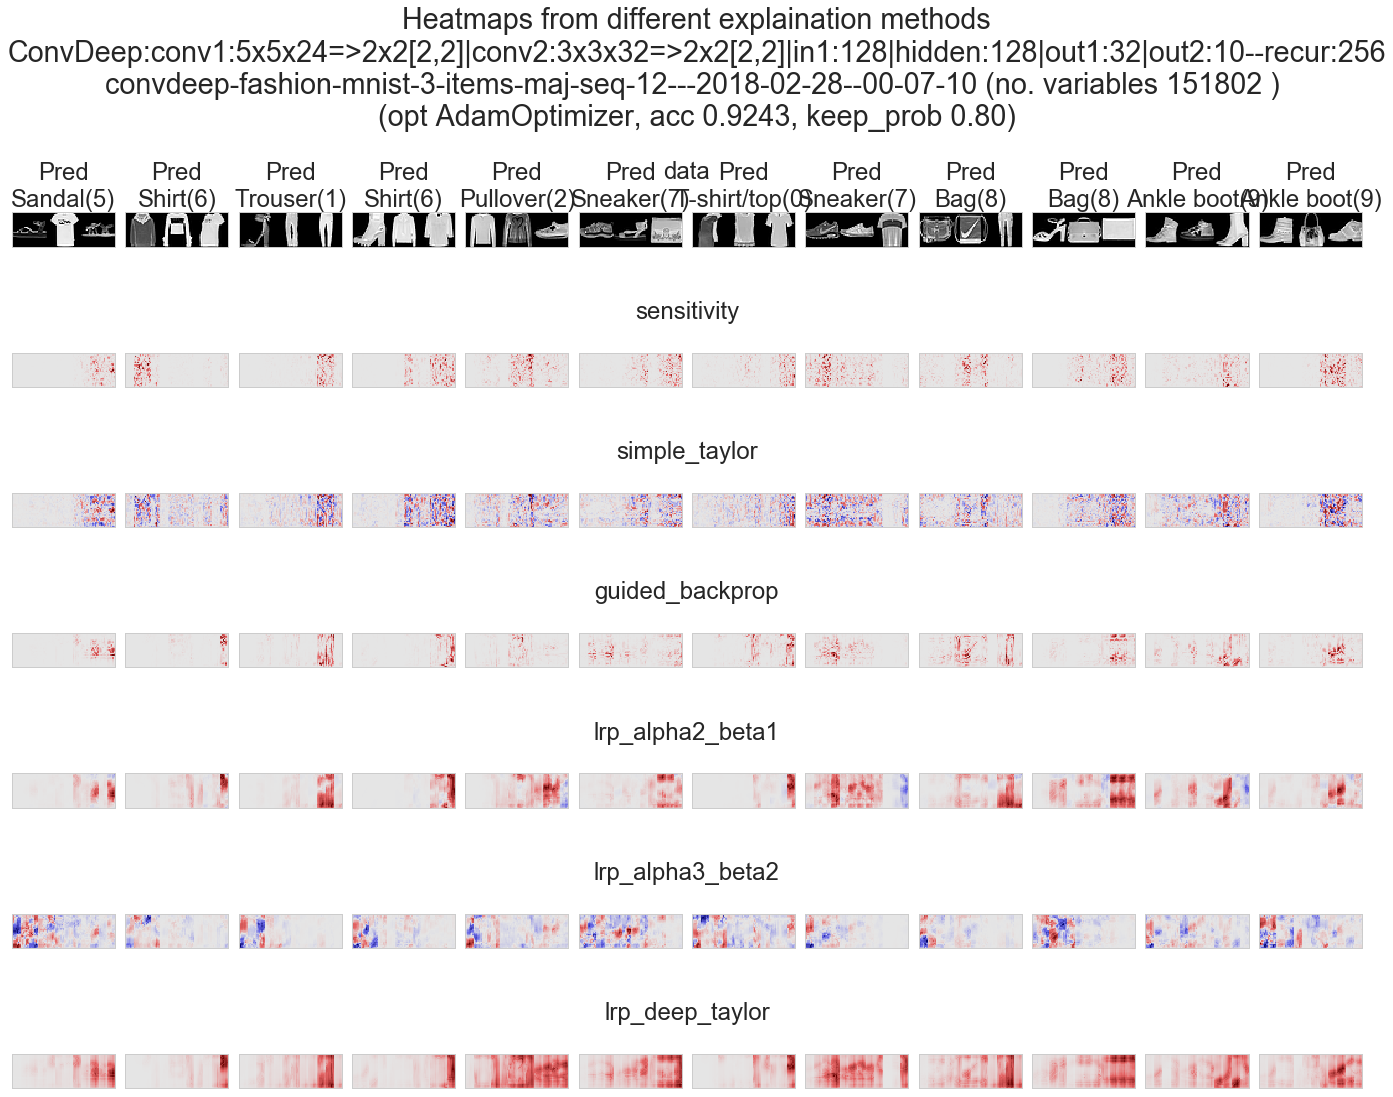

In [13]:
plot.plot_relevance_methods("../final-models/convdeep-fashion-mnist-3-items-maj-seq-12", 
                            dataset_loader) 

/Users/heytitle/projects/heatmapping-tutorial/src/model/components/layer.py:25: RuntimeWarning: divide by zero encountered in log
  self.b = tf.Variable(tf.ones(dims[-1]) * float(np.log(np.exp(DEFAULT_BIAS_VALUE)-1)), name=b_name)


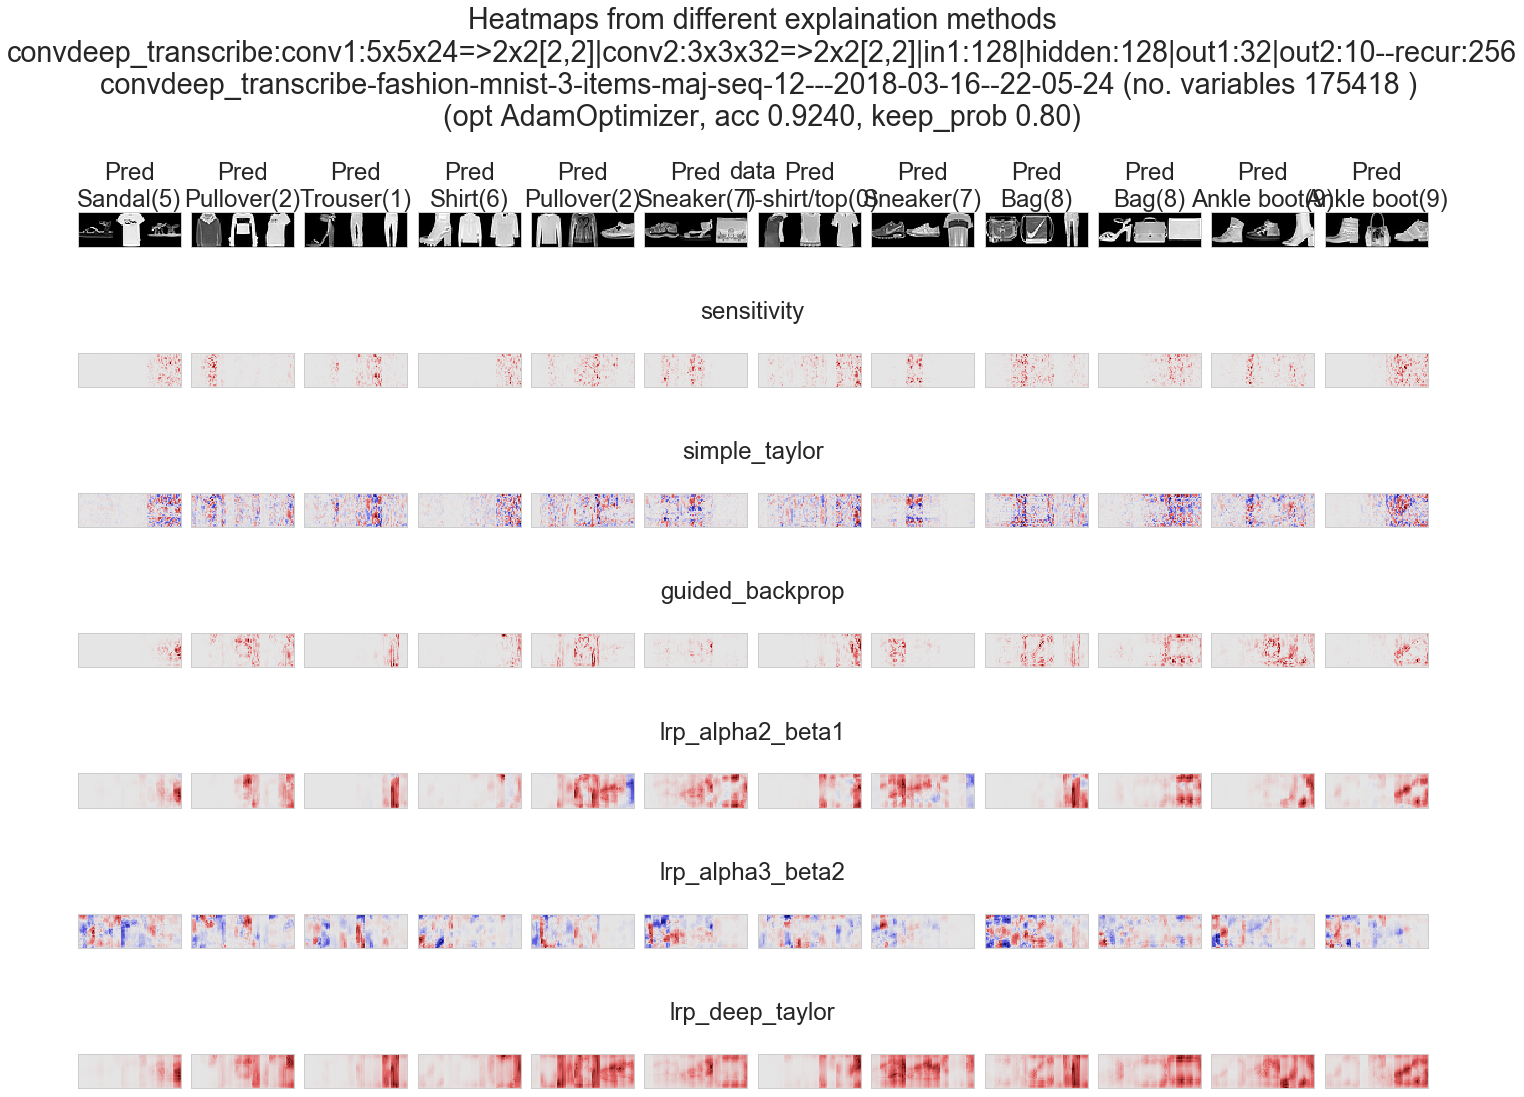

In [46]:
plot.plot_relevance_methods("../final-models/convdeep_transcribe-fashion-mnist-3-items-maj-seq-12", 
                            dataset_loader) 

## Stats

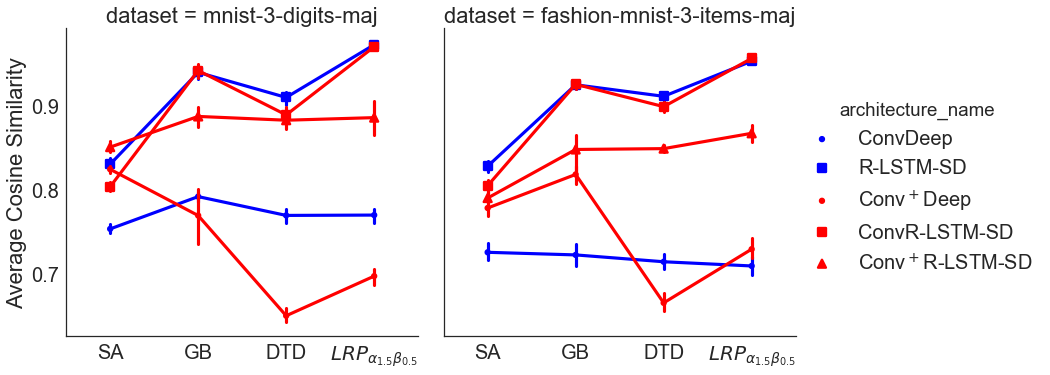

In [7]:
def plot_relevance_dist_in_middle_region(models, methods=['sensitivity', 'guided_backprop', 'lrp_deep_taylor', 'lrp_alpha1_5_beta_5'], 
                                         palette=None, markers=None,
                                         metric_name='adjusted_rel_dist_in_data_region'):
    results = []


    architectures = []
    
    df = plot.get_stats_from_models(models)
    df = df[df.method.isin(methods)]

    architectures = set(df.architecture.values)
        

    architecture_idx = dict(zip(architectures, range(len(architectures))))
    
    if markers is None:
        markers = ['.']*len(architectures)

    def get_marker_linestyle(method):
        if method == 'guided_backprop':
            mk = 's'
            ls = '-'
        elif 'lrp' in method:
            mk = '^'
            ls = '-'
        else:
            mk = '.'
            ls =':'
        return mk, ls
    
    marker_linestyles = [get_marker_linestyle(m) for m in methods]


    df['architecture_idx'] = df['architecture'].apply(lambda x : architecture_idx[x])
    df['architecture_name'] = df['architecture'].apply(config.architecture_name)
    method_indices = dict(zip(methods, range(len(methods))))
    df['method_idx'] = df['method'].apply(lambda m: method_indices[m])

    if metric_name == 'rel_dist_in_data_region':
        col_name = 'Percentage of relevance \n in data region'
    elif metric_name == 'adjusted_rel_dist_in_data_region':
        col_name = 'Adjusted percentage of relevance \n in data region'
    elif metric_name == 'avg_cosine_sim_relevance':
        col_name = 'Average Cosine Similarity'
        
    df[col_name] = df[metric_name]


    g = sns.factorplot(x="method_idx", y=col_name, col='dataset', hue="architecture_name",
                       data=df, size=6, markers=markers, palette=palette)

    g.set_xticklabels([config.METHOD_ABBREVATIONS[m] for m in methods])
    g.set(xlabel='')

    return df, g



contran_models = [
    ## cv-models
    '../final-models-group/convdeep-mnist-3-digits-maj-seq-12-fold*',

    '../final-models-group/convdeep-fashion-mnist-3-items-maj-seq-12-fold*',
    '../final-models-group/rlstm_persisted_dropout-*-maj-seq-12-fold-*',    

    
    '../final-models-group/convdeep_transcribe-*-maj-seq-12-fold*',

    
    '../final-models-group/convrlstm_persisted_dropout-*-maj-seq-12-fold*',

    '../final-models-group/convtran_rlstm_persisted_dropout-*-maj-seq-12-fold*',
  
    ## one model
#     '../final-models/convdeep-mnist-3-digits-maj-seq-12',

#     '../final-models/convdeep-fashion-mnist-3-items-maj-seq-12',
#     '../final-models/rlstm_persisted_dropout-*-maj-seq-12',    

    
#     '../final-models/convdeep_transcribe-*-maj-seq-12',
    
#     '../final-models/convrlstm_persisted_dropout-*-maj-seq-12',

#     '../final-models-group/convtran_rlstm_persisted_dropout-*-maj-seq-12-fold*',
    
]
_ = plot_relevance_dist_in_middle_region(models=contran_models,
                                         metric_name='avg_cosine_sim_relevance',
                                         palette=['blue', 'blue',  'red', 'red', 'red',], 
                                         markers=['.', 's', '.', 's', '^'],
                                        )

plot.show_and_save('rel-maj-convdeep_trans-experiment.svg')

In [8]:
def model_group_acc(model_paths):
    results=[]
    for p in model_paths:
        models = glob.glob(p)
        for m in models:
            try:            
                with open("%s/result.yaml" % m , 'r') as stream:
                    result = yaml.load(stream)
                    results.append(dict(dataset=result['dataset'], architecture=result['architecture_name'], accuracy=result['accuracy']))
            except:
                print('skip %s' % m)
    df_ = pd.DataFrame(results)
    architectures = set(df_.architecture.values)
    datasets = set(df_.dataset.values)

    results = []
    for d in datasets:
        for a in architectures:
            acc_values = df_[(df_.architecture == a) & (df_.dataset == d)]['accuracy'] * 100
            results.append(dict(dataset=d, architecture=a, avg_acc=np.mean(acc_values), std=np.std(acc_values), count=len(acc_values)))
    return pd.DataFrame(results)[['dataset', 'architecture', 'count', 'avg_acc', 'std']]
model_group_acc(contran_models)

dataset                      architecture  count  \
0         mnist-3-digits-maj               convdeep_transcribe      7   
1         mnist-3-digits-maj                          convdeep      7   
2         mnist-3-digits-maj       convrlstm_persisted_dropout      7   
3         mnist-3-digits-maj  convtran_rlstm_persisted_dropout      7   
4         mnist-3-digits-maj           rlstm_persisted_dropout      7   
5  fashion-mnist-3-items-maj               convdeep_transcribe      7   
6  fashion-mnist-3-items-maj                          convdeep      7   
7  fashion-mnist-3-items-maj       convrlstm_persisted_dropout      7   
8  fashion-mnist-3-items-maj  convtran_rlstm_persisted_dropout      7   
9  fashion-mnist-3-items-maj           rlstm_persisted_dropout      7   

     avg_acc       std  
0  97.891418  0.198763  
1  99.282845  0.073725  
2  99.599991  0.046678  
3  98.297157  0.184159  
4  98.752849  0.124819  
5  89.142856  0.276959  
6  94.189999  0.212804  
7  95.438572  0.135586  
8  89.705714  0.421489  
9  93.418572  0.251308

In [10]:
plot.show_model_accuracy('mnist-3-digits-maj', models=['convdeep', 'convdeep_transcribe'], seqs=[12])

mnist-3-digits-maj accuracy


/Users/heytitle/projects/heatmapping-tutorial/src/model/components/layer.py:25: RuntimeWarning: divide by zero encountered in log
  self.b = tf.Variable(tf.ones(dims[-1]) * float(np.log(np.exp(DEFAULT_BIAS_VALUE)-1)), name=b_name)


seq  ConvDeep  convdeep_transcribe
0   12    0.9907               0.9916

In [49]:
plot.show_model_accuracy('fashion-mnist-3-items-maj', models=['convdeep', 'convdeep_transcribe'], seqs=[12])

fashion-mnist-3-items-maj accuracy


/Users/heytitle/projects/heatmapping-tutorial/src/model/components/layer.py:25: RuntimeWarning: divide by zero encountered in log
  self.b = tf.Variable(tf.ones(dims[-1]) * float(np.log(np.exp(DEFAULT_BIAS_VALUE)-1)), name=b_name)


seq  ConvDeep  convdeep_transcribe
0   12    0.9243                0.924

# Deep vs R-LSTM
### Standard LSTM
![](https://i.imgur.com/rDB9txG.png)
### R-LSTM
![](https://i.imgur.com/LpyKkWn.png)
### Naive Dropout
![](https://i.imgur.com/L3B0pYJ.png)
### Variotion Dropout(rlstm_persisted_dropout)
![](https://i.imgur.com/a2PadbP.png)

## MNIST

/Users/heytitle/projects/heatmapping-tutorial/src/model/components/layer.py:25: RuntimeWarning: divide by zero encountered in log
  self.b = tf.Variable(tf.ones(dims[-1]) * float(np.log(np.exp(DEFAULT_BIAS_VALUE)-1)), name=b_name)


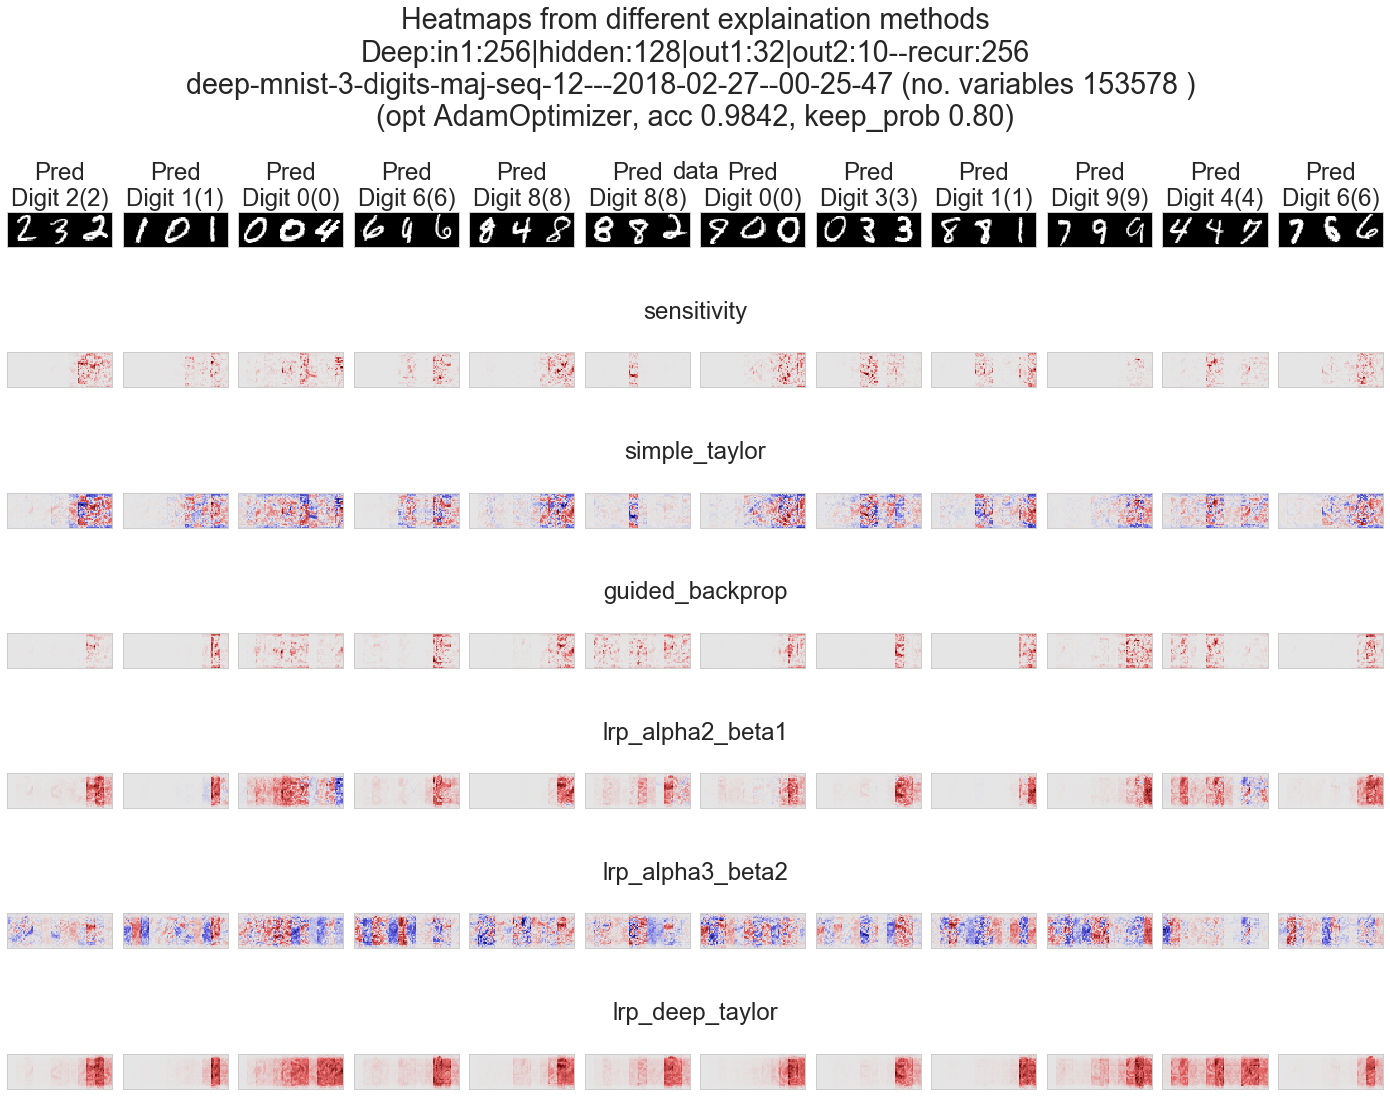

In [15]:
plot.plot_relevance_methods("../final-models/deep-mnist-3-digits-maj-seq-12", dataset_loader) 

/Users/heytitle/projects/heatmapping-tutorial/src/model/components/layer.py:34: RuntimeWarning: divide by zero encountered in log
  self.b = tf.Variable(tf.ones(dims[-1]) * float(np.log(np.exp(DEFAULT_BIAS_VALUE)-1)), name=b_name)


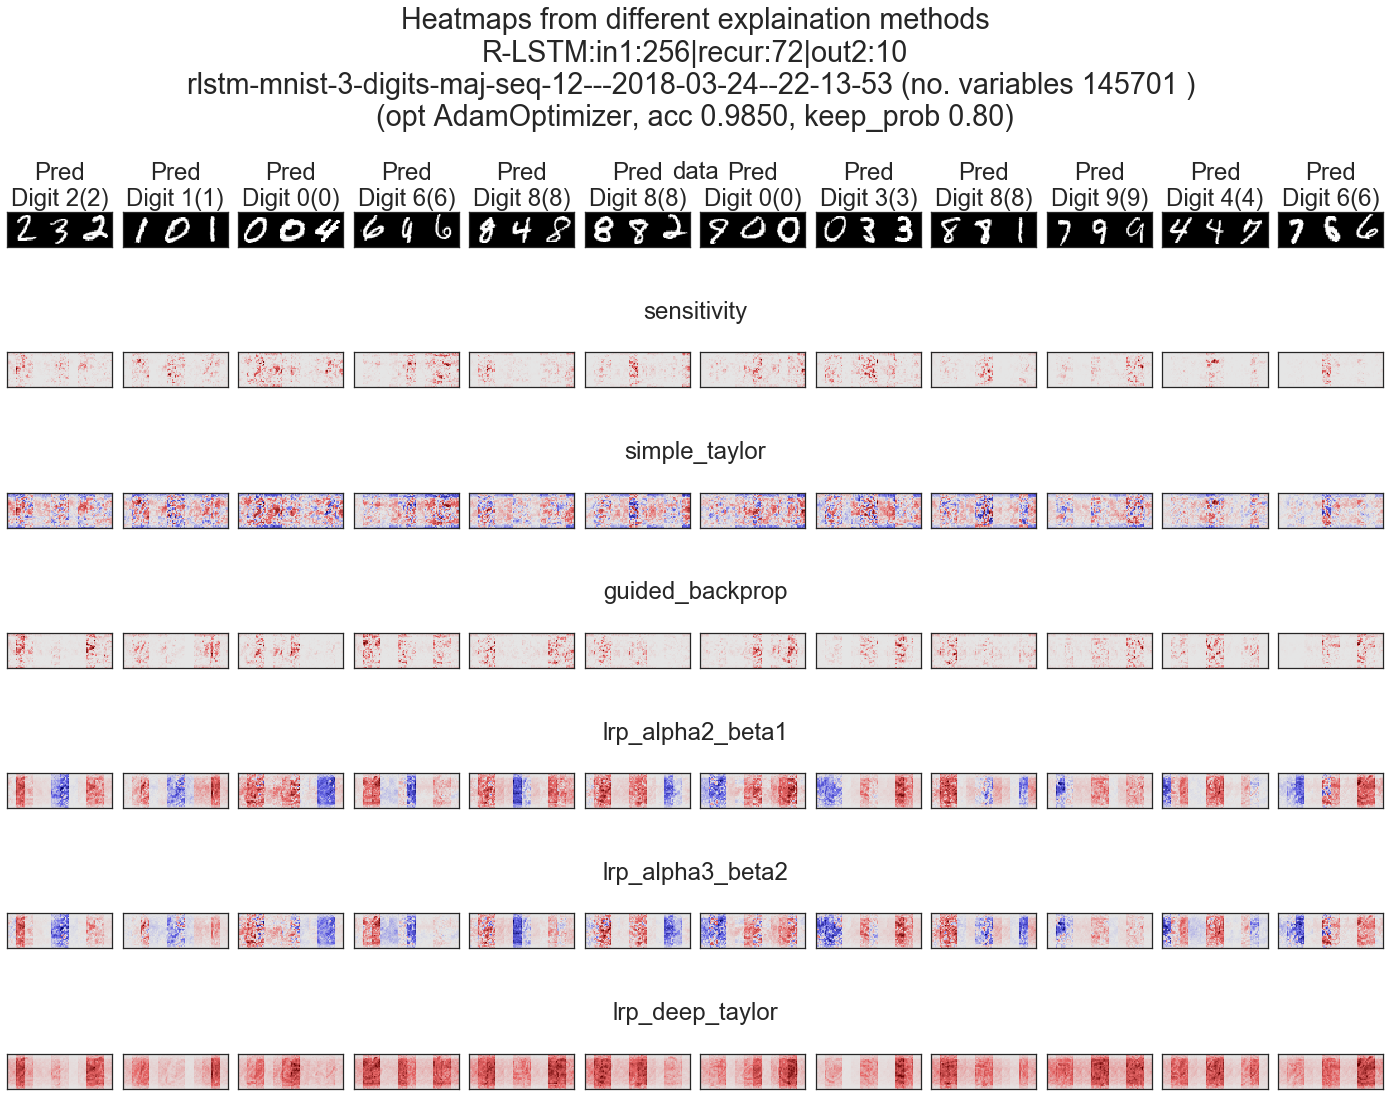

In [15]:
plot.plot_relevance_methods("../final-models/rlstm-mnist-3-digits-maj-seq-12", dataset_loader) 

/Users/heytitle/projects/heatmapping-tutorial/src/model/components/layer.py:34: RuntimeWarning: divide by zero encountered in log
  self.b = tf.Variable(tf.ones(dims[-1]) * float(np.log(np.exp(DEFAULT_BIAS_VALUE)-1)), name=b_name)


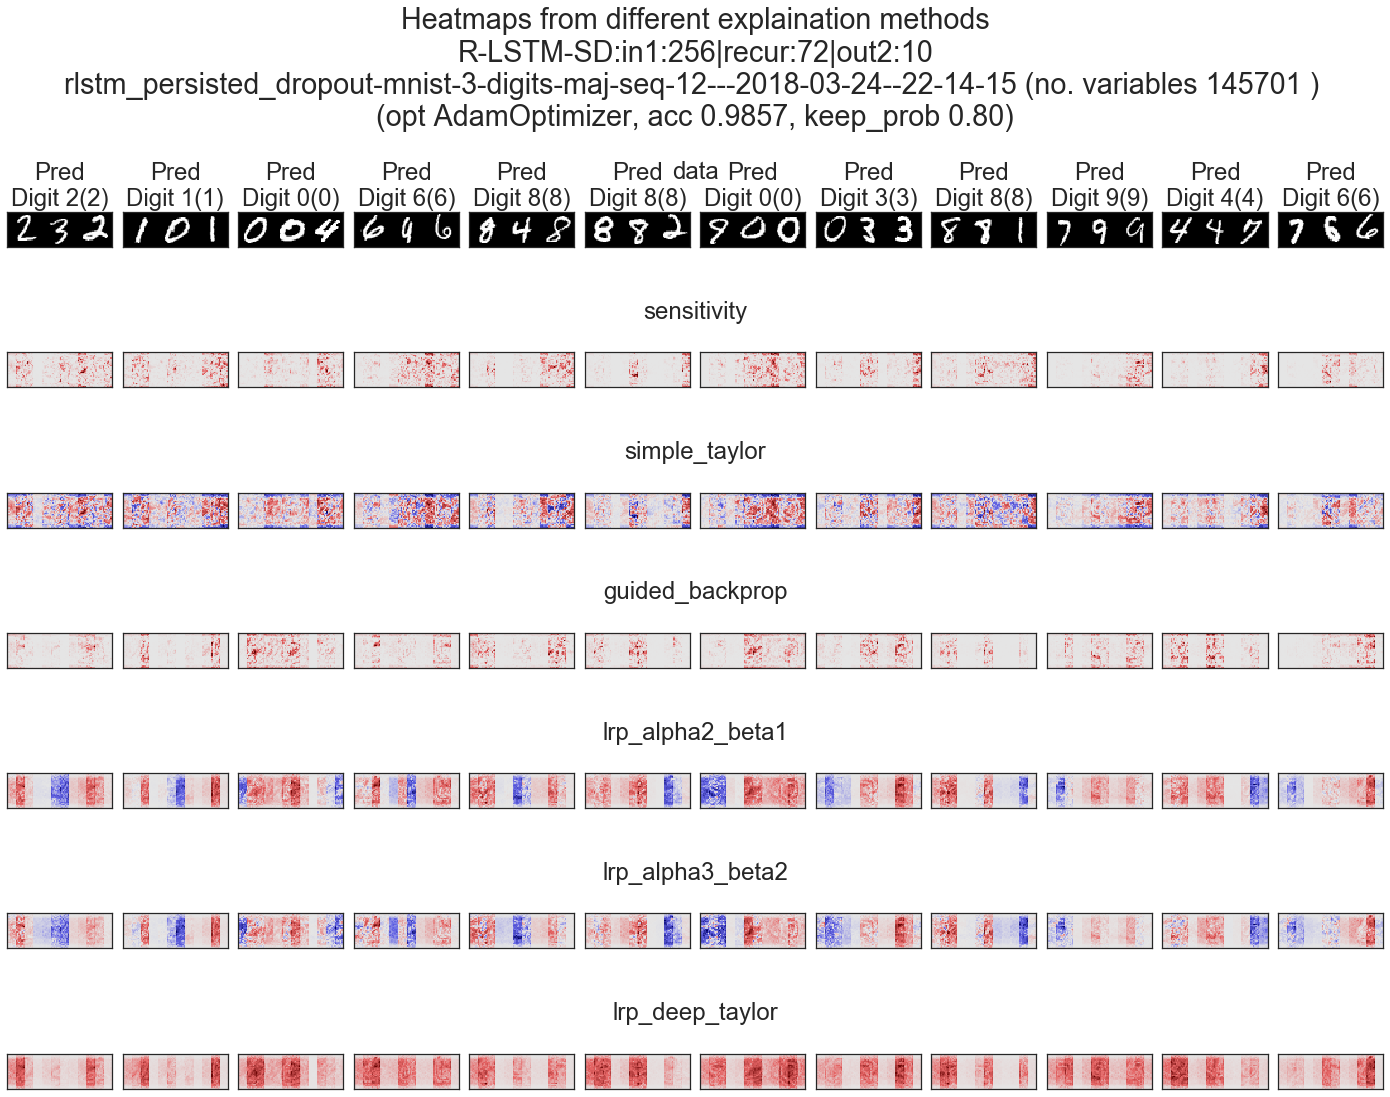

In [16]:
plot.plot_relevance_methods("../final-models/rlstm_persisted_dropout-mnist-3-digits-maj-seq-12", dataset_loader) 

## FashionMNIST

/Users/heytitle/projects/heatmapping-tutorial/src/model/components/layer.py:25: RuntimeWarning: divide by zero encountered in log
  self.b = tf.Variable(tf.ones(dims[-1]) * float(np.log(np.exp(DEFAULT_BIAS_VALUE)-1)), name=b_name)


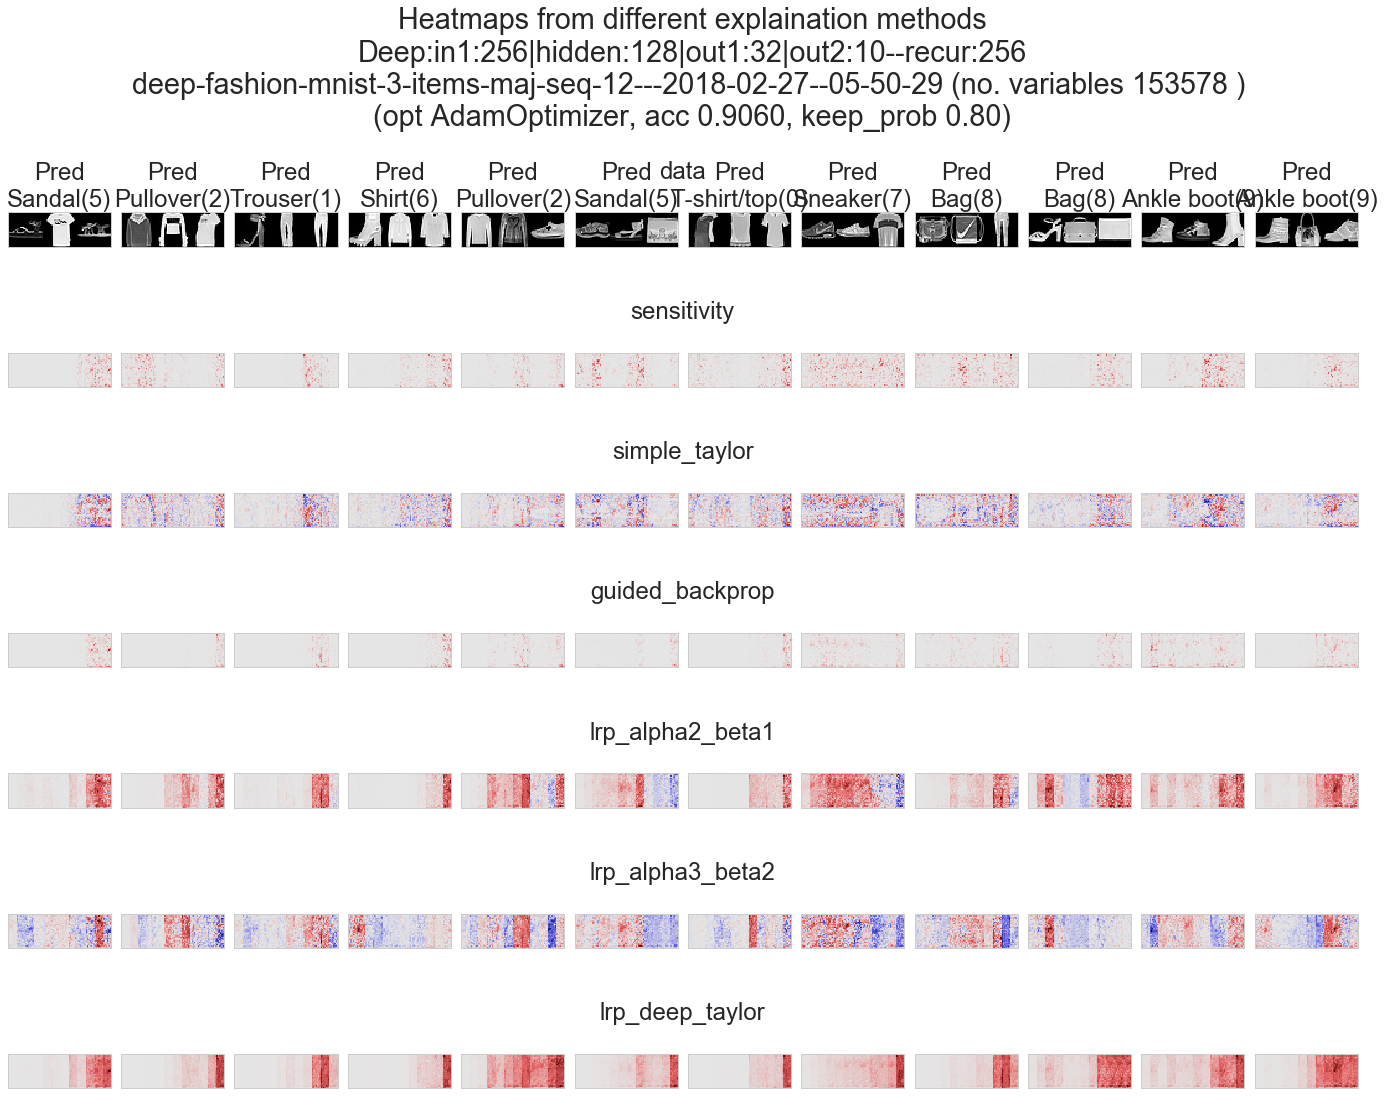

In [53]:
plot.plot_relevance_methods("../final-models/deep-fashion-mnist-3-items-maj-seq-12", dataset_loader) 

/Users/heytitle/projects/heatmapping-tutorial/src/model/components/layer.py:25: RuntimeWarning: divide by zero encountered in log
  self.b = tf.Variable(tf.ones(dims[-1]) * float(np.log(np.exp(DEFAULT_BIAS_VALUE)-1)), name=b_name)


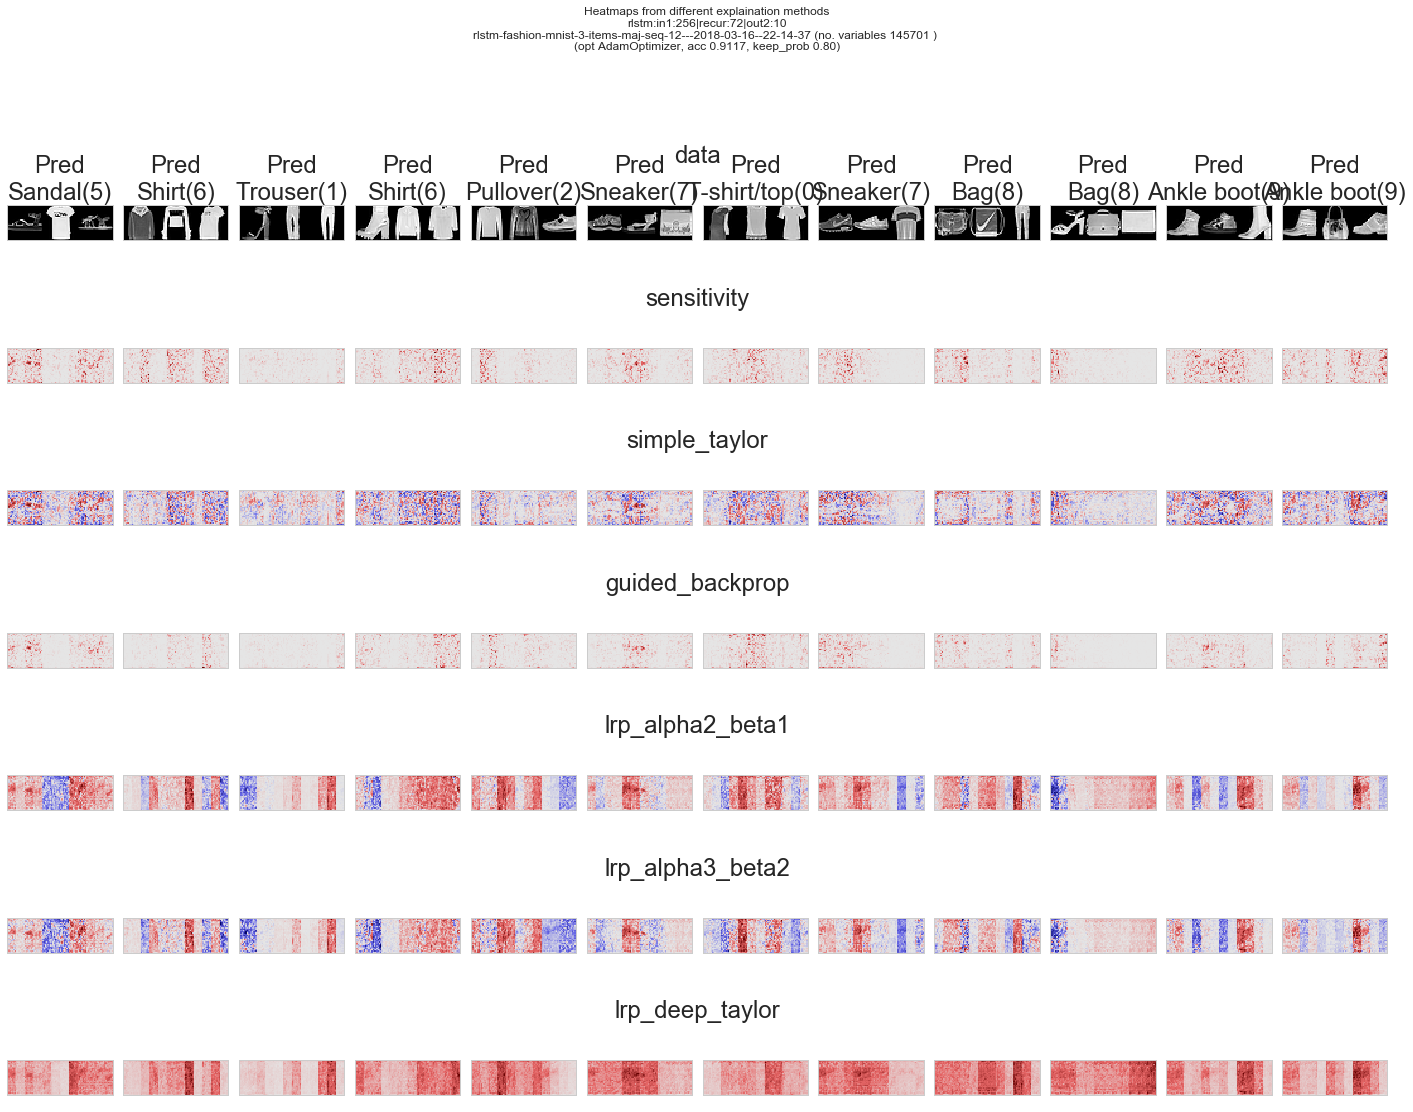

In [9]:
plot.plot_relevance_methods("../final-models/rlstm-fashion-mnist-3-items-maj-seq-12", dataset_loader) 

/Users/heytitle/projects/heatmapping-tutorial/src/model/components/layer.py:25: RuntimeWarning: divide by zero encountered in log
  self.b = tf.Variable(tf.ones(dims[-1]) * float(np.log(np.exp(DEFAULT_BIAS_VALUE)-1)), name=b_name)


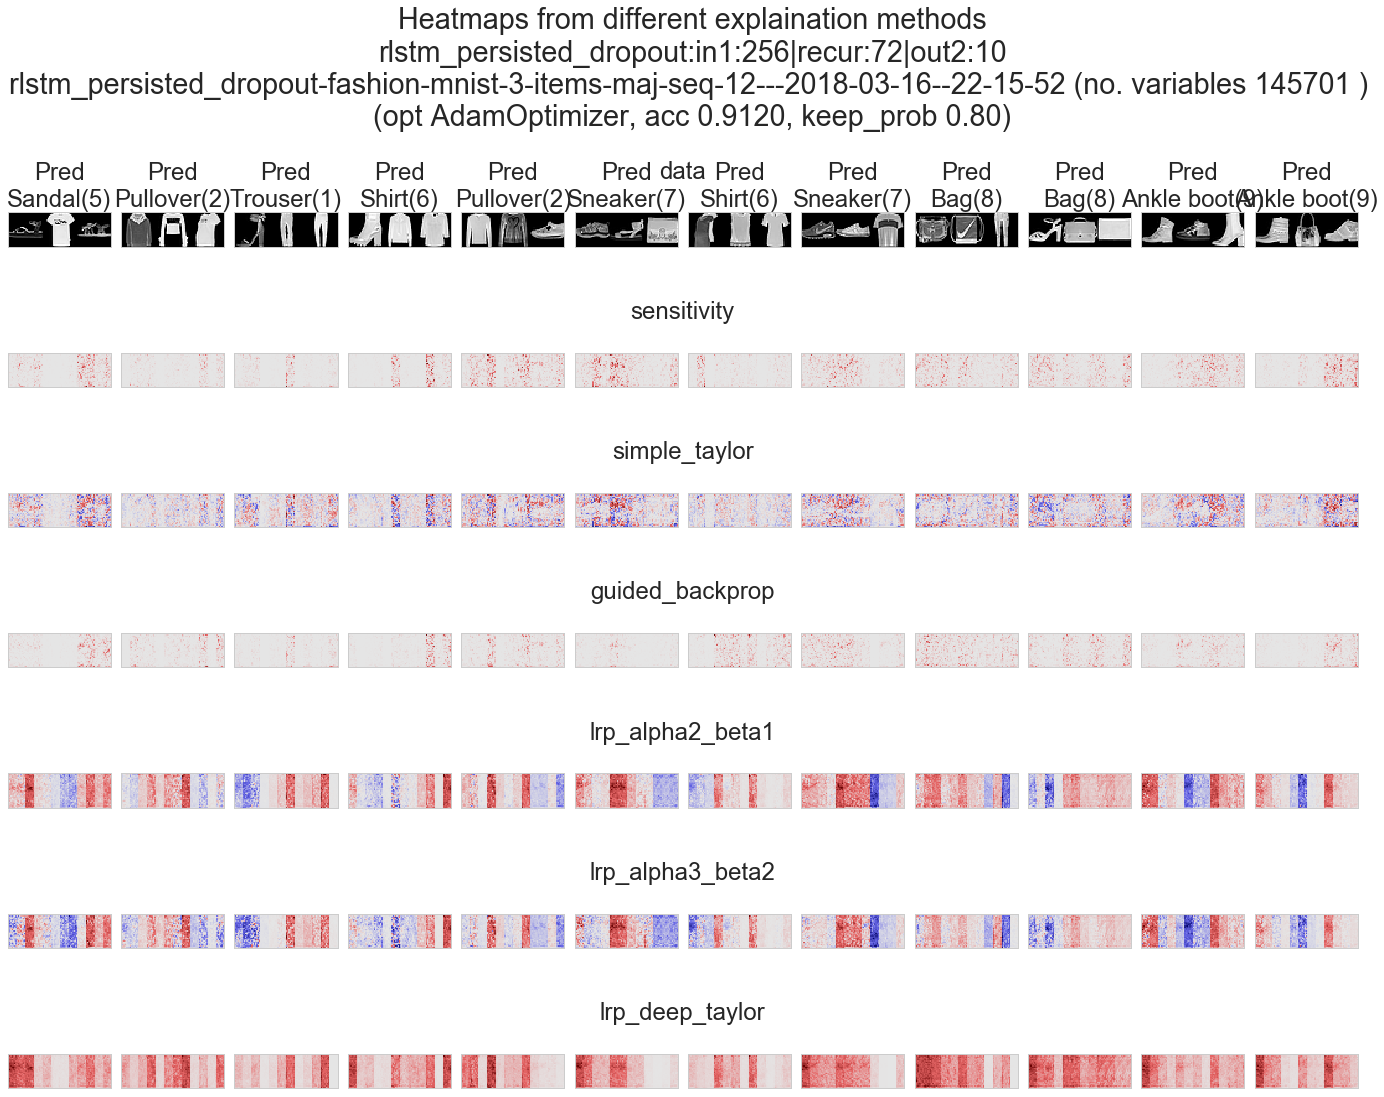

In [57]:
plot.plot_relevance_methods("../final-models/rlstm_persisted_dropout-fashion-mnist-3-items-maj-seq-12", dataset_loader) 

/Users/heytitle/projects/heatmapping-tutorial/src/model/components/layer.py:34: RuntimeWarning: divide by zero encountered in log
  self.b = tf.Variable(tf.ones(dims[-1]) * float(np.log(np.exp(DEFAULT_BIAS_VALUE)-1)), name=b_name)


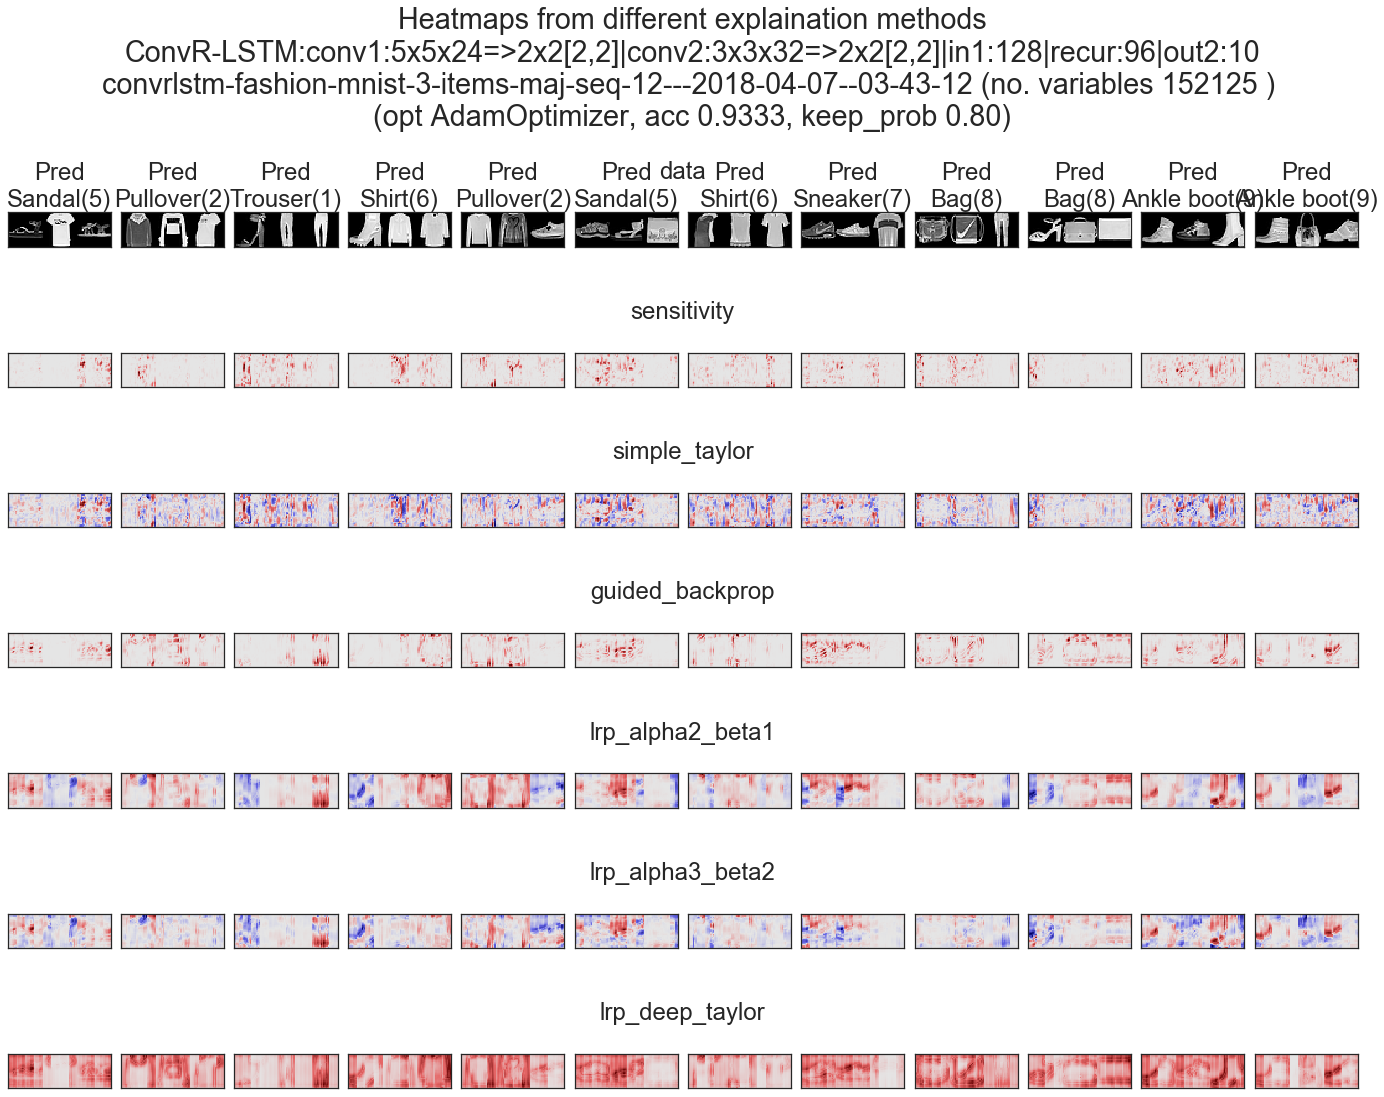

In [143]:
plot.plot_relevance_methods("../final-models/convrlstm-fashion-mnist-3-items-maj-seq-12", dataset_loader) 

## Stats

In [86]:
import imp
imp.reload(config)

<module 'config' from '/Users/heytitle/projects/heatmapping-tutorial/src/config.py'>

../experiment-results/models-for-exp3-100epoches/rgru-mnist-3-digits-maj-seq-12---2018-04-08--23-38-08/rel-dist.pkl not found
../experiment-results/models-for-exp3-100epoches/rgru-mnist-3-digits-maj-seq-12---2018-04-08--23-39-39/rel-dist.pkl not found
../experiment-results/models-for-exp3-100epoches/rgru-mnist-3-digits-maj-seq-12---2018-04-08--23-41-22/rel-dist.pkl not found


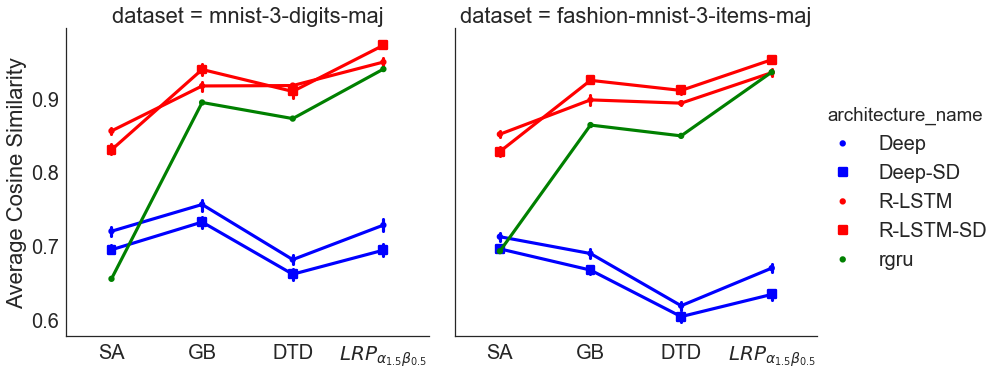

In [151]:
rlstm_models = [
    ## cv-models
    '../final-models-group/deep-m*-maj-seq-12-fold-*',
    '../final-models-group/deep-f*-maj-seq-12-fold-*',

    '../final-models-group/deep_persisted_dropout-*-maj-seq-12-fold-*',
    
    
    '../final-models-group/rlstm-*-maj-seq-12-fold-*',
    '../final-models-group/rlstm_persisted_dropout-*-maj-seq-12-fold-*',
    
    '../experiment-results/models-for-exp3-100epoches/rgru-*-maj-seq-12*',
    
    ## individual models
#     '../final-models/deep-m*-maj-seq-12',
#     '../final-models/deep-f*-maj-seq-12',

#     '../final-models/deep_persisted_dropout-*-maj-seq-12',
    
    
#     '../final-models/rlstm-*-maj-seq-12',
#     '../final-models/rlstm_persisted_dropout-*-maj-seq-12',

    
]
_ = plot_relevance_dist_in_middle_region(models = rlstm_models, 
                                         palette=['blue', 'blue', 'red', 'red', 'green'], markers=['.', 's', '.', 's', '.'], 
                                         metric_name='avg_cosine_sim_relevance')

plot.show_and_save('rel-maj-rlstm-experiment.svg')

In [31]:
model_group_acc(rlstm_models)

dataset                 architecture  count    avg_acc  \
0  fashion-mnist-3-items-maj       deep_persisted_dropout      7  91.865714   
1  fashion-mnist-3-items-maj                         deep      7  91.352859   
2  fashion-mnist-3-items-maj      rlstm_persisted_dropout      7  93.418572   
3  fashion-mnist-3-items-maj  convrlstm_persisted_dropout      7  95.438572   
4  fashion-mnist-3-items-maj                        rlstm      7  93.402857   
5         mnist-3-digits-maj       deep_persisted_dropout      7  98.427113   
6         mnist-3-digits-maj                         deep      7  98.431412   
7         mnist-3-digits-maj      rlstm_persisted_dropout      7  98.752849   
8         mnist-3-digits-maj  convrlstm_persisted_dropout      7  99.599991   
9         mnist-3-digits-maj                        rlstm      7  98.765707   

        std  
0  0.313637  
1  0.305320  
2  0.251308  
3  0.135586  
4  0.271382  
5  0.159900  
6  0.092627  
7  0.124819  
8  0.046678  
9  0.060343

In [33]:
plot.show_model_accuracy('fashion-mnist-3-items-maj', models=['rlstm', 'rlstm_persisted_dropout'], seqs=[12])

fashion-mnist-3-items-maj accuracy


/Users/heytitle/projects/heatmapping-tutorial/src/model/components/layer.py:25: RuntimeWarning: divide by zero encountered in log
  self.b = tf.Variable(tf.ones(dims[-1]) * float(np.log(np.exp(DEFAULT_BIAS_VALUE)-1)), name=b_name)


seq   rlstm  rlstm_persisted_dropout
0   12  0.9117                    0.912

In [34]:
plot.show_model_accuracy('mnist-3-digits-maj', models=['rlstm', 'rlstm_persisted_dropout'], seqs=[12])

mnist-3-digits-maj accuracy


/Users/heytitle/projects/heatmapping-tutorial/src/model/components/layer.py:25: RuntimeWarning: divide by zero encountered in log
  self.b = tf.Variable(tf.ones(dims[-1]) * float(np.log(np.exp(DEFAULT_BIAS_VALUE)-1)), name=b_name)


seq  rlstm  rlstm_persisted_dropout
0   12  0.987                   0.9858

# Shallow, Deep, DeepV2 and ConvDeep Experiment

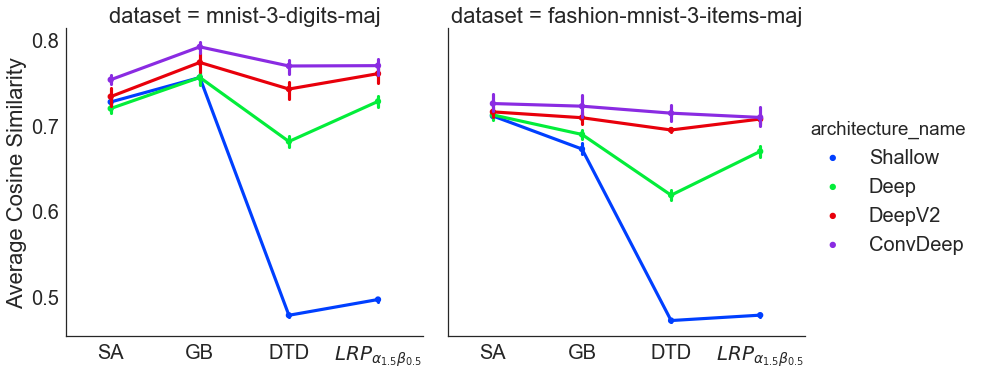

In [9]:
exp2_models = [
        # cv-models
    '../final-models-group/shallow-m*-maj-seq-12-fold-*',
    '../final-models-group/shallow-f*-maj-seq-12-fold-*',
    '../final-models-group/deep-*-maj-seq-12-fold-*',
    '../final-models-group/deep_v2-*-maj-seq-12-fold-*',
    '../final-models-group/convdeep-*-maj-seq-12-fold-*',
#     '../final-models-group/rlstm-*-maj-seq-12-fold-*',
#     '../final-models-group/rlstm_persisted_dropout-*-maj-seq-12-fold-*',

#     # individual models
#     '../final-models/shallow-m*-maj-seq-12',
#     '../final-models/shallow-f*-maj-seq-12',
#     '../final-models/deep-*-maj-seq-12',
#     '../final-models/deep_v2-*-maj-seq-12',
#     '../final-models/convdeep-*-maj-seq-12',

]
_ = plot_relevance_dist_in_middle_region(models = exp2_models, metric_name='avg_cosine_sim_relevance',
                                         markers=['.']*4
                                         
                                        )

plot.show_and_save('rel-maj-exp1-experiment.svg')

In [16]:
model_group_acc(exp2_models)

# Paper Model

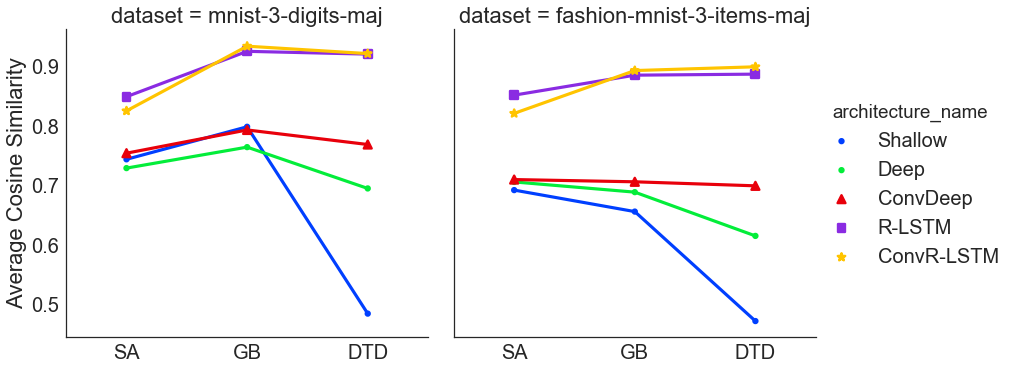

In [3]:
paper_models = [    
    ## 200 epochs
#     '../final-models-200-epoches/shallow-m*-maj-seq-12',
#     '../final-models-200-epoches/shallow-f*-maj-seq-12',

    
#     '../final-models-200-epoches/deep-*-maj-seq-12',



#     '../final-models-200-epoches/convdeep-*-maj-seq-12',
#     '../final-models-200-epoches/rlstm-*-maj-seq-12',
    
    ## 100 epochs
    '../final-models-200-epoches/shallow-m*-maj-seq-12',
    '../final-models-200-epoches/shallow-f*-maj-seq-12',
    
    '../final-models-200-epoches/deep-*-maj-seq-12',


    '../final-models-200-epoches/convdeep-*-maj-seq-12',
    '../final-models-200-epoches/rlstm-*-maj-seq-12',
    '../experiment-results/models-for-exp3-100epoches/convrlstm-*-maj-seq-12*',

]

_ = plot_relevance_dist_in_middle_region(models = paper_models, 
#                                          palette=['blue', 'blue', 'red', 'red'], 
                                         methods=['sensitivity', 'guided_backprop', 'lrp_deep_taylor'],
                                         markers=['.', '.', '^', 's', '*'], 
                                         metric_name='avg_cosine_sim_relevance',
#                                          metric_name='rel_dist_in_data_region'
                                        )

plot.show_and_save('rel-maj-paper-experiment.svg')

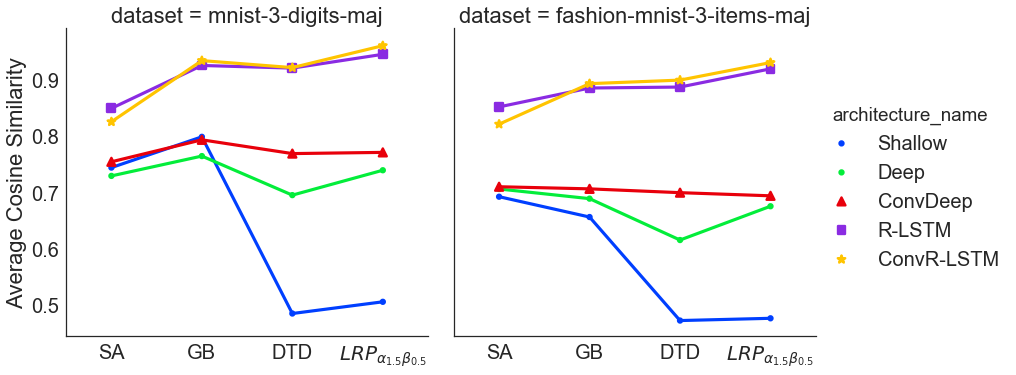

In [146]:
_ = plot_relevance_dist_in_middle_region(models = paper_models, 
#                                          palette=['blue', 'blue', 'red', 'red'], 
                                         methods=['sensitivity', 'guided_backprop', 'lrp_deep_taylor', 'lrp_alpha1_5_beta_5'],
                                         markers=['.', '.', '^', 's', '*'], 
                                         metric_name='avg_cosine_sim_relevance',
#                                          metric_name='rel_dist_in_data_region'
                                        )

plot.show_and_save('rel-maj-poster-experiment.svg')

In [141]:
plot.show_model_accuracy('mnist-3-digits-maj', models=['shallow', 'deep', 'convdeep', 'rlstm', 'convrlstm'], seqs=[12])

mnist-3-digits-maj accuracy


/Users/heytitle/projects/heatmapping-tutorial/src/model/components/layer.py:34: RuntimeWarning: divide by zero encountered in log
  self.b = tf.Variable(tf.ones(dims[-1]) * float(np.log(np.exp(DEFAULT_BIAS_VALUE)-1)), name=b_name)


seq  Shallow    Deep  ConvDeep  R-LSTM  ConvR-LSTM
0   12   0.9812  0.9816    0.9922   0.985      0.9926

In [142]:
plot.show_model_accuracy('fashion-mnist-3-items-maj', models=['shallow', 'deep', 'convdeep', 'rlstm', 'convrlstm'], seqs=[12])

fashion-mnist-3-items-maj accuracy


/Users/heytitle/projects/heatmapping-tutorial/src/model/components/layer.py:34: RuntimeWarning: divide by zero encountered in log
  self.b = tf.Variable(tf.ones(dims[-1]) * float(np.log(np.exp(DEFAULT_BIAS_VALUE)-1)), name=b_name)


seq  Shallow    Deep  ConvDeep  R-LSTM  ConvR-LSTM
0   12      0.9  0.8981    0.9287  0.9135      0.9333

# Poster model

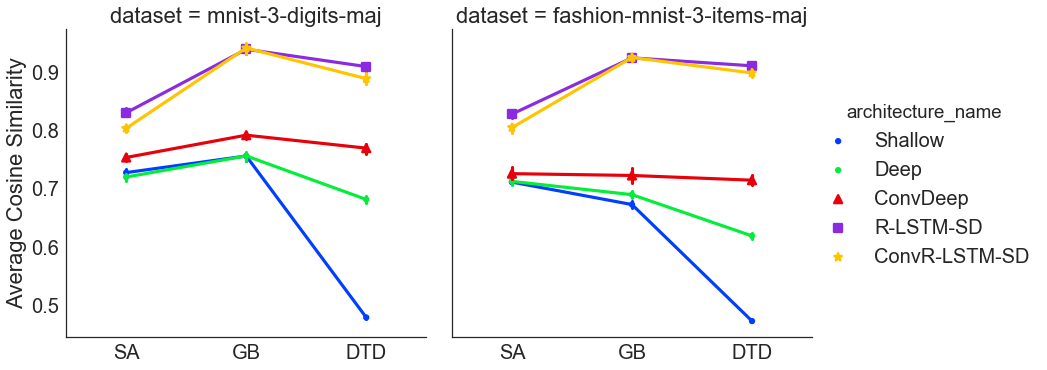

In [21]:
poster_models = [    

    '../final-models-group/shallow-m*-maj-seq-12-fold-*',
    '../final-models-group/shallow-f*-maj-seq-12-fold-*',
    
    '../final-models-group/deep-*-maj-seq-12-fold-*',
    '../final-models-group/convdeep-*-maj-seq-12-fold-*',
    '../final-models-group/rlstm_persisted_dropout-*-maj-seq-12-fold-*',
    '../final-models-group/convrlstm_persisted_dropout-*-maj-seq-12-fold-*',
#         '../final-models-group/shallow-m*-maj-seq-12-fold-*',
#     '../final-models-group/shallow-f*-maj-seq-12-fold-*',
#     '../final-models-group/deep-*-maj-seq-12-fold-*',
#     '../final-models-group/deep_v2-*-maj-seq-12-fold-*',
#     '../final-models-group/convdeep-*-maj-seq-12-fold-*',
#     '../experiment-results/models-for-exp3-100epoches/convrlstm-*-maj-seq-12*',

]

_ = plot_relevance_dist_in_middle_region(models = poster_models, 
#                                          palette=['blue', 'blue', 'red', 'red'], 
                                         methods=['sensitivity', 'guided_backprop', 'lrp_deep_taylor'],
                                         markers=['.', '.', '^', 's', '*'], 
                                         metric_name='avg_cosine_sim_relevance',
#                                          metric_name='rel_dist_in_data_region'
                                        )

plot.show_and_save('rel-maj-poster-experiment.svg')

In [7]:
model_group_acc(poster_models)

dataset architecture  count    avg_acc  std
0         mnist-3-digits-maj     convdeep      1  99.220002  0.0
1         mnist-3-digits-maj         deep      1  98.159999  0.0
2         mnist-3-digits-maj        rlstm      1  98.500001  0.0
3         mnist-3-digits-maj    convrlstm      1  99.260002  0.0
4         mnist-3-digits-maj      shallow      1  98.119998  0.0
5  fashion-mnist-3-items-maj     convdeep      1  92.869997  0.0
6  fashion-mnist-3-items-maj         deep      1  89.810002  0.0
7  fashion-mnist-3-items-maj        rlstm      1  91.350001  0.0
8  fashion-mnist-3-items-maj    convrlstm      1  93.330002  0.0
9  fashion-mnist-3-items-maj      shallow      1  89.999998  0.0

# Accuarcy for appendix

In [96]:
all_models = [
 '../final-models-group/convdeep-*-maj-seq-12-fold-*',
 '../final-models-group/convdeep_transcribe-*-maj-seq-12-fold*',
 '../final-models-group/convrlstm_persisted_dropout-*-maj-seq-12-fold*',
 '../final-models-group/convtran_rlstm_persisted_dropout-*-maj-seq-12-fold*',
 '../final-models-group/deep-*-maj-seq-12-fold-*',
 '../final-models-group/deep_persisted_dropout-*-maj-seq-12-fold-*',
 '../final-models-group/deep_v2-*-maj-seq-12-fold-*',
 '../final-models-group/rlstm-*-maj-seq-12-fold-*',
 '../final-models-group/rlstm_persisted_dropout-*-maj-seq-12-fold-*',
 '../final-models-group/shallow-*-maj-seq-12-fold-*'
]


df_model_acc = model_group_acc(all_models)
df_model_acc['dataset'] = df_model_acc['dataset'].map(lambda x: x.split('-')[0] + '-' + x.split('-')[-1] )
# df_model_acc['avg_acc'] = df_model_acc['avg_acc'].map(lambda x: '%02.2f' % x )
# df_model_acc['std'] = df_model_acc['std'].map(lambda x: str('%01.4f' % x) ).astype(str)
df_model_acc['count'] = df_model_acc['count'].map(lambda x: str(x).strip() )

In [103]:
with open( '/Users/heytitle/projects/thesis-writing/hypothesis-testing-results/model_acc.txt','w') as f:

    tab = tabulate(df_model_acc, headers='keys', tablefmt='psql', showindex=False,
                   floatfmt=(None, None, None, ".2f", ".4f"))
    print(tab)
    f.write(tab)

+-------------+----------------------------------+---------+-----------+--------+
| dataset     | architecture                     |   count |   avg_acc |    std |
|-------------+----------------------------------+---------+-----------+--------|
| mnist-maj   | deep_v2                          |       7 |     98.48 | 0.1274 |
| mnist-maj   | shallow                          |       7 |     98.35 | 0.2393 |
| mnist-maj   | convrlstm_persisted_dropout      |       7 |     99.60 | 0.0467 |
| mnist-maj   | deep                             |       7 |     98.43 | 0.0926 |
| mnist-maj   | rlstm_persisted_dropout          |       7 |     98.75 | 0.1248 |
| mnist-maj   | rlstm                            |       7 |     98.77 | 0.0603 |
| mnist-maj   | convtran_rlstm_persisted_dropout |       7 |     98.30 | 0.1842 |
| mnist-maj   | deep_persisted_dropout           |       7 |     98.43 | 0.1599 |
| mnist-maj   | convdeep_transcribe              |       7 |     97.89 | 0.1988 |
| mnist-maj   | 

In [82]:
df_model_acc

dataset                      architecture count avg_acc      std
0     mnist-maj                           deep_v2     7   98.48  0.12740
1     mnist-maj                           shallow     7   98.35  0.23930
2     mnist-maj       convrlstm_persisted_dropout     7   99.60  0.04670
3     mnist-maj                              deep     7   98.43  0.09260
4     mnist-maj           rlstm_persisted_dropout     7   98.75  0.12480
5     mnist-maj                             rlstm     7   98.77  0.06030
6     mnist-maj  convtran_rlstm_persisted_dropout     7   98.30  0.18420
7     mnist-maj            deep_persisted_dropout     7   98.43  0.15990
8     mnist-maj               convdeep_transcribe     7   97.89  0.19880
9     mnist-maj                          convdeep     7   99.28  0.07370
10  fashion-maj                           deep_v2     7   92.07  0.35960
11  fashion-maj                           shallow     7   92.30  0.25500
12  fashion-maj       convrlstm_persisted_dropout     7   95.44  0.13560
13  fashion-maj                              deep     7   91.35  0.30530
14  fashion-maj           rlstm_persisted_dropout     7   93.42  0.25130
15  fashion-maj                             rlstm     7   93.40  0.27140
16  fashion-maj  convtran_rlstm_persisted_dropout     7   89.71  0.42150
17  fashion-maj            deep_persisted_dropout     7   91.87  0.31360
18  fashion-maj               convdeep_transcribe     7   89.14  0.27700
19  fashion-maj                          convdeep     7   94.19  0.21280

# Work in progress

In [135]:
import imp
imp.reload(plot)

<module 'notebook_utils.plot' from '/Users/heytitle/projects/heatmapping-tutorial/src/notebook_utils/plot.py'>

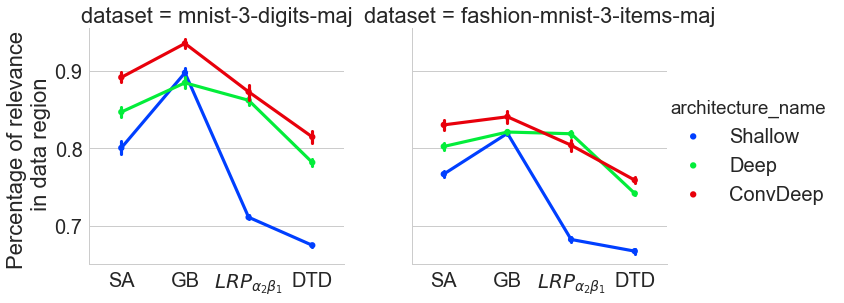

In [47]:


exp2_mnist_models_all = [
    '../experiment-results/models-for-exp3/shallow-mnist-3-digits-maj-seq-12---2018-03-15--01-28-55--fold-*',
    '../experiment-results/models-for-exp3/deep-mnist-3-digits-maj-seq-12---2018-03-15--01-28-42--fold-*',
    '../experiment-results/models-for-exp3/convdeep-mnist-3-digits-maj-seq-12---2018-03-15--01-30-08--fold-*',
    
    '../experiment-results/models-for-exp3/shallow-fashion-mnist-3-items-maj-seq-12---2018-03-15--23-38-13--fold-*',
    '../experiment-results/models-for-exp3/deep-fashion-mnist-3-items-maj-seq-12---2018-03-15--23-38-13--fold-*',
    '../experiment-results/models-for-exp3/convdeep-fashion-mnist-3-items-maj-seq-12---2018-03-16--09-20-39--fold-*'
    
]

df, _ = plot_relevance_dist_in_middle_region(models=exp2_mnist_models_all)

In [48]:
model_group_acc(model_paths=exp2_mnist_models_all)

dataset architecture  count    avg_acc       std
0  fashion-mnist-3-items-maj         deep     10  91.665716  0.355665
1  fashion-mnist-3-items-maj      shallow     10  92.232857  0.324952
2  fashion-mnist-3-items-maj     convdeep     10  93.824285  0.348468
3         mnist-3-digits-maj         deep     10  98.419962  0.133393
4         mnist-3-digits-maj      shallow     10  98.525667  0.188381
5         mnist-3-digits-maj     convdeep     10  99.209945  0.143762

In [16]:
def hypothesis_testing(base, model_paths, methods=['sensitivity', 'guided_backprop', 'lrp_deep_taylor', 'lrp_alpha2_beta1'],
                       significance_level=0.025):

    def highlight(s):
        return ['font-weight: bold' if v < significance_level else '' for v in s]

    results = []
    print('paired t-test p value against `%s` architecture\n highlighted when the value <= %f' % (base, significance_level))
    df = plot.get_stats_from_models(model_paths)

    architectures = set(df.architecture.values)
    
    models = list(filter(lambda x: x != base, set(df.architecture.values)))
    for m in models: 
        dd = [('architecture', m)]
        for med in methods:
            baseline = df[(df.architecture == base) & (df.method==med)]['rel_dist_in_data_region']
            comparing_model = df[(df.architecture == m) & (df.method==med)]['rel_dist_in_data_region']
            s = stats.ttest_rel(comparing_model, baseline)
            pv = s.pvalue/2.0
            if s.statistic < 0 :
                pv = 1-pv
            dd.append((med, pv))
        results.append(dict(dd))
        
    df_res = pd.DataFrame(results)[['architecture'] + methods].style.apply(highlight, subset=methods)
    return df_res


exp2_mnist_models = [
    '../experiment-results/models-for-exp3/shallow-mnist-3-digits-maj-seq-12---2018-03-13--09-08-41--run-*',
    '../experiment-results/models-for-exp3/deep-mnist-3-digits-maj-seq-12---2018-03-12--00-16-50--run-*',
    '../experiment-results/models-for-exp3/convdeep-mnist-3-digits-maj-seq-12---2018-03-12--07-59-42--run-*',
]
hypothesis_testing(base='shallow', model_paths=exp2_mnist_models)

paired t-test p value against `shallow` architecture
 highlighted when the value <= 0.025000


In [17]:
def model_group_acc(model_paths):
    results=[]
    for p in model_paths:
        models = glob.glob(p)
        for m in models:
            try:            
                with open("%s/result.yaml" % m , 'r') as stream:
                    result = yaml.load(stream)
                    results.append(dict(dataset=result['dataset'], architecture=result['architecture_name'], accuracy=result['accuracy']))
            except:
                print('skip %s' % m)
    df_ = pd.DataFrame(results)
    architectures = set(df_.architecture.values)
    datasets = set(df_.dataset.values)

    results = []
    for d in datasets:
        for a in architectures:
            acc_values = df_[(df_.architecture == a) & (df_.dataset == d)]['accuracy'] * 100
            results.append(dict(dataset=d, architecture=a, avg_acc=np.mean(acc_values), std=np.std(acc_values), count=len(acc_values)))
    return pd.DataFrame(results)[['dataset', 'architecture', 'count', 'avg_acc', 'std']]
model_group_acc(exp2_mnist_models)

dataset architecture  count    avg_acc       std
0  mnist-3-digits-maj         deep      5  98.197999  0.171627
1  mnist-3-digits-maj     convdeep      5  99.088001  0.063055
2  mnist-3-digits-maj      shallow      5  98.262000  0.080846

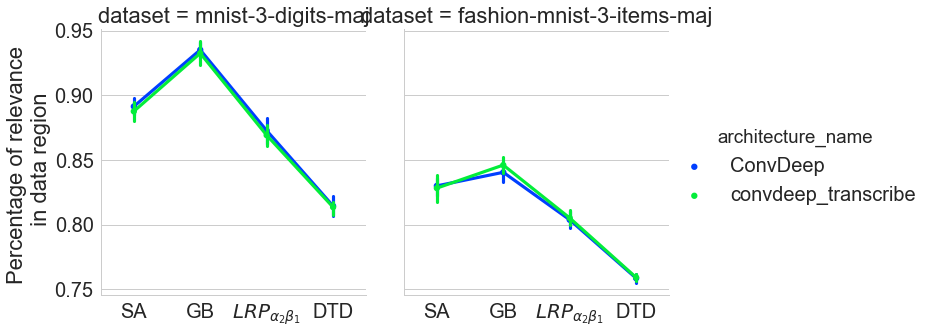

In [13]:
conv_vs_convliteral = [
    '../experiment-results/models-for-exp3/convdeep-mnist-3-digits-maj-seq-12---2018-03-15--01-30-08--fold-*',
    '../experiment-results/models-for-exp3/convdeep_transcribe-mnist-3-digits-maj-seq-12---2018-03-15--13-43-20--fold-*',
    
    '../experiment-results/models-for-exp3/convdeep-fashion-mnist-3-items-maj-seq-12---2018-03-16--09-20-39--fold-*',
#     '../experiment-results/models-for-exp3/convrlstm_persisted_dropout-mnist-3-digits-maj-seq-12---2018-03-18--21-56-25',
#     '../experiment-results/models-for-exp3/convrlstm_persisted_dropout-mnist-3-digits-maj-seq-12---2018-03-19--00-10-16',
    '../experiment-results/models-for-exp3/convdeep_transcribe-fashion-mnist-3-items-maj-seq-12---2018-03-19--08-39-23--fold-*'
]
_ = plot_relevance_dist_in_middle_region(models=conv_vs_convliteral)

In [18]:
model_group_acc(conv_vs_convliteral)

dataset         architecture  count    avg_acc       std
0  fashion-mnist-3-items-maj  convdeep_transcribe     10  94.111428  0.339255
1  fashion-mnist-3-items-maj             convdeep     10  93.824285  0.348468
2         mnist-3-digits-maj  convdeep_transcribe     10  99.197116  0.125974
3         mnist-3-digits-maj             convdeep     10  99.209945  0.143762

../experiment-results/models-for-exp3/deep-fashion-mnist-3-items-maj-seq-12---2018-03-15--23-38-13--fold-9/rel-dist.pkl not found


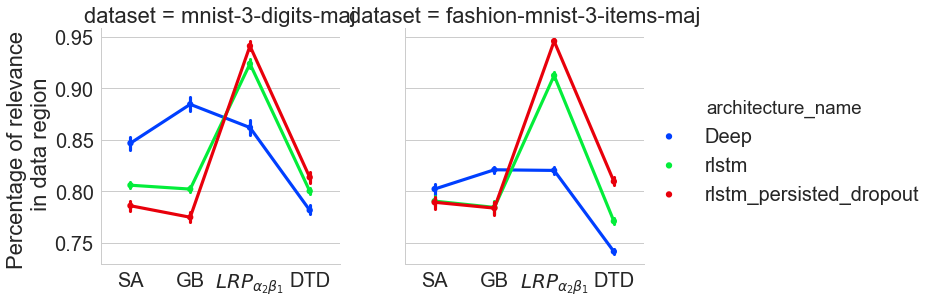

In [25]:
deep_vs_lstm_models = [
    '../experiment-results/models-for-exp3/deep-mnist-3-digits-maj-seq-12---2018-03-15--01-28-42--fold-*',
    '../experiment-results/models-for-exp3/rlstm-mnist-3-digits-maj-seq-12---2018-03-15--01-29-53--fold-*',
    '../experiment-results/models-for-exp3/rlstm_persisted_dropout-mnist-3-digits-maj-seq-12---2018-03-15--01-31-42--fold-*',
    
    '../experiment-results/models-for-exp3/deep-fashion-mnist-3-items-maj-seq-12---2018-03-15--23-38-13--fold-*',
    '../experiment-results/models-for-exp3/rlstm-fashion-mnist-3-items-maj-seq-12---2018-03-15--23-38-13--fold-*',
    '../experiment-results/models-for-exp3/rlstm_persisted_dropout-fashion-mnist-3-items-maj-seq-12---2018-03-15--23-38-22--fold-*'
]
_ = plot_relevance_dist_in_middle_region(models=deep_vs_lstm_models)
# hypothesis_testing('deep', deep_vs_lstm_models)

In [26]:
model_group_acc(deep_vs_lstm_models)

FileNotFoundError: [Errno 2] No such file or directory: '../experiment-results/models-for-exp3/deep-fashion-mnist-3-items-maj-seq-12---2018-03-15--23-38-13--fold-9/result.yaml'